In [1]:
# If the below code doesn't work uncomment this and run (this adds the parent directory to the path)
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 


In [2]:
import matplotlib.pyplot as plt
from BasicSetupUtilities.MetaDataBuilder import CountryMetaDataFile
from DataIOUtilities.DataLib import DataLib, DatastreamPulls
import pandas as pd
import numpy as np
import utilityfunctions as uf
import generate_indicators as gi

In [3]:
countryList = ['USA', 'AUS', 'JPN', 'CAN', 'CHE', 'GBR', 'ESP', 'FRA', 'ITA', 'DEU']
countries = CountryMetaDataFile().readMetadata().loc[countryList]
start_date = '1980-01'


##Bespoke code name dictionaries
MSCIEquityDictionary = {
                        'US':'MSUSAML',
                        'AU':'MSAUSTL',
                        'JP':'MSJPANL',
                        'CN':'MSCNDAL',
                        'SW':'MSSWITL',
                        'UK':'MSUTDKL',
                        'ES':'MSSPANL',
                        'FR':'MSFRNCL',
                        'IT':'MSITALL',
                        'BD':'MSGERML'
}

dl = DataLib("SignalData")
dsPuller = DatastreamPulls(countries)

In [4]:
locs = ['USA', 'AUS', 'JPN', 'CAN', 'CHE', 'GBR', 'ESP', 'FRA', 'ITA', 'DEU']
tf = ['1980-01-01', '2020-01-01']

In [5]:
bondReturnIdx_locFX = dsPuller.ds_country_pull(lambda x: f'BM{x}10Y', start_date, 'RI', 'D')

In [6]:
bond_one_year_rolling_returns = bondReturnIdx_locFX.rolling(261, min_periods=100).apply(lambda x: x.iloc[-1] / x.iloc[0] - 1, raw=False)
bond_one_year_rolling_returns['mean'] = bond_one_year_rolling_returns.mean(axis=1)
shifted_returns = bond_one_year_rolling_returns.shift(-261)
shifted_returns_diff_from_mean = shifted_returns.subtract(shifted_returns['mean'], axis=0)

In [7]:
LongRates = dl.pull('LongRates')
ShortRates = dl.pull('ShortRates')

In [8]:
bond_risk_premium = LongRates - ShortRates

In [9]:
curve_height = (LongRates + ShortRates) / 2

['1980-01-01', '2020-01-01']


c:\users\19177\.virtualenvs\internship2020-cuzesdj7\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


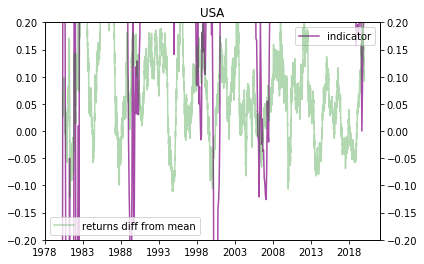

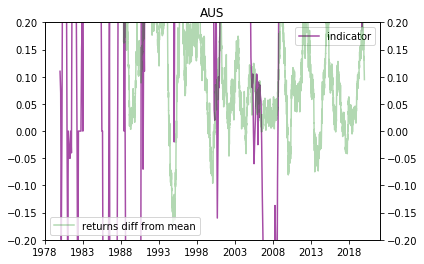

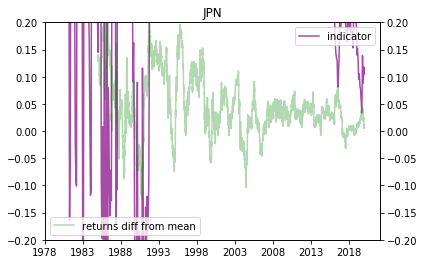

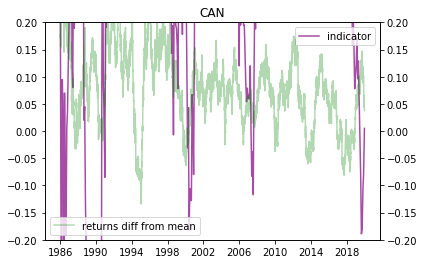

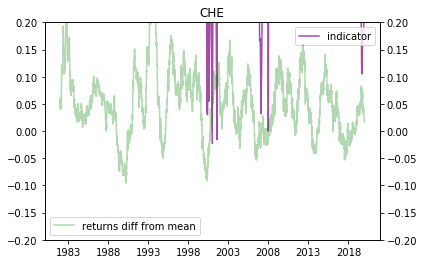

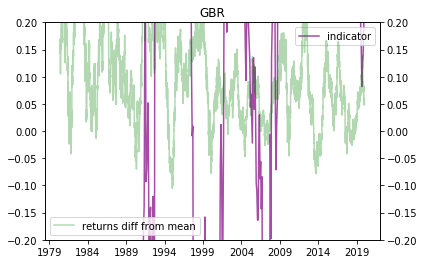

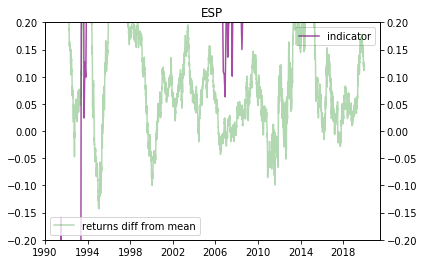

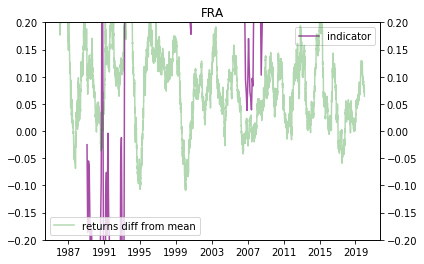

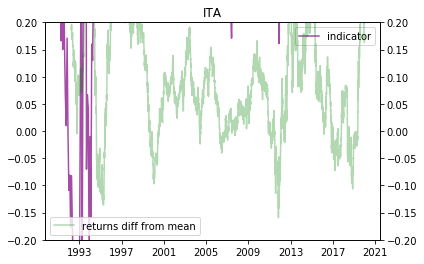

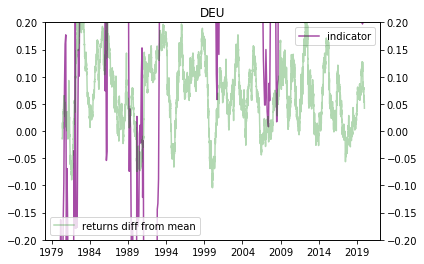

In [10]:
tfs = [tf]
uf.plot_vs_returns(countryList, bond_risk_premium, bond_one_year_rolling_returns, tfs)

['1980-01-01', '2020-01-01']


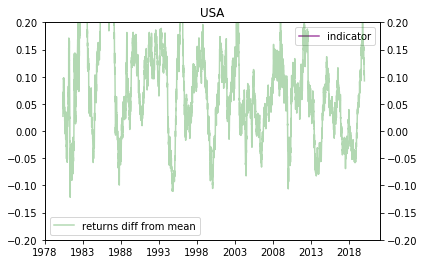

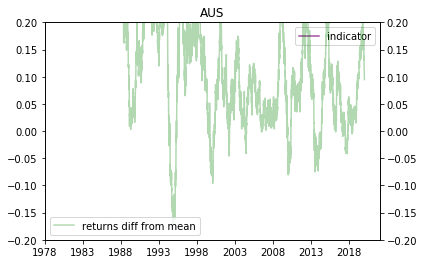

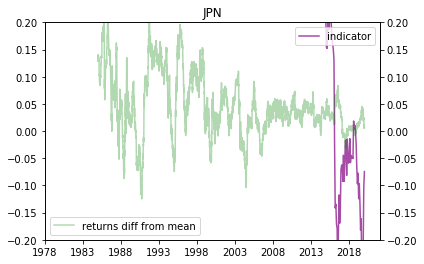

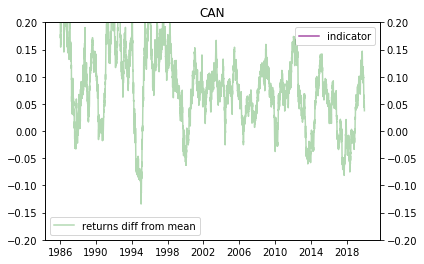

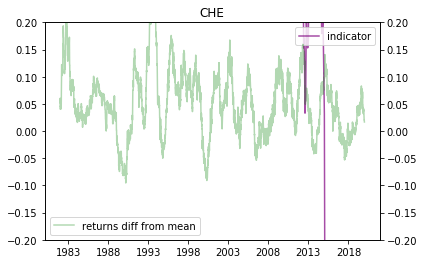

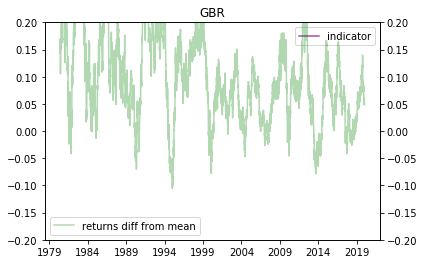

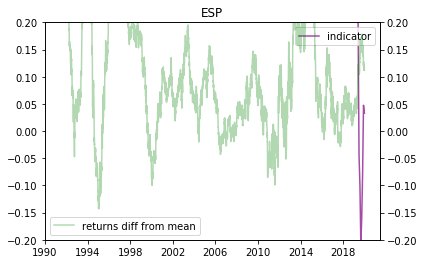

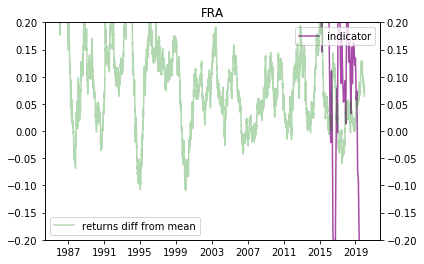

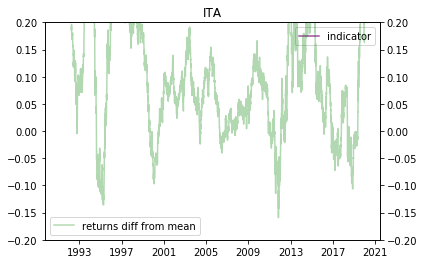

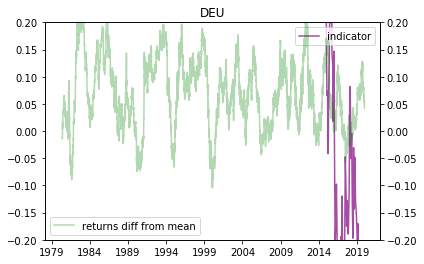

In [11]:
uf.plot_vs_returns(countryList, curve_height, bond_one_year_rolling_returns, tfs)

['1980-01-01', '2020-01-01']


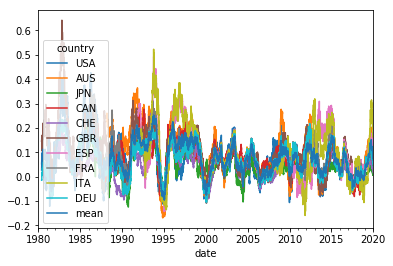

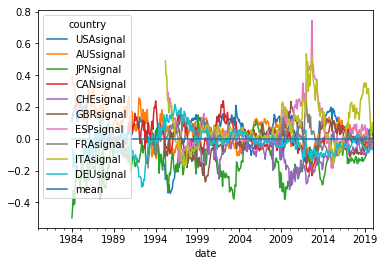

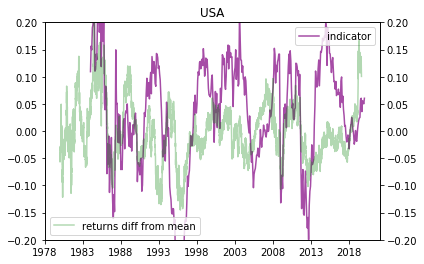

0.40986802125341865


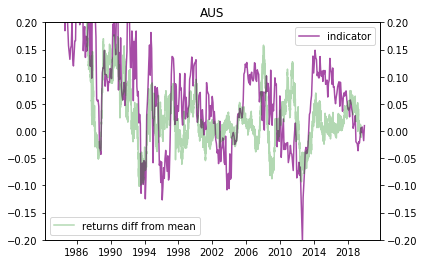

0.3917562550413701


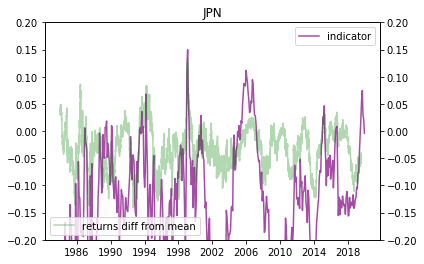

0.2874218560442678


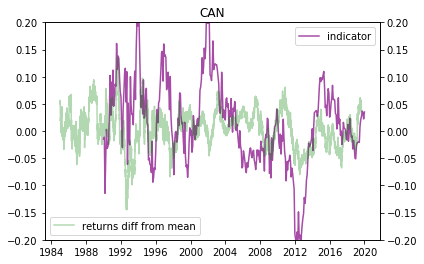

0.1667522445668156


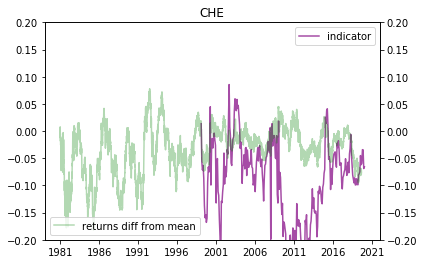

0.09451334413330405


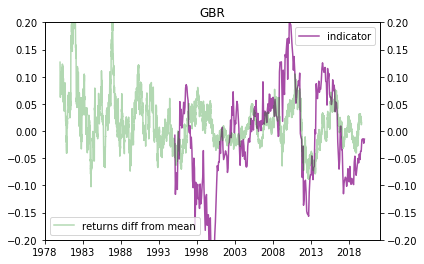

0.26409896952992734


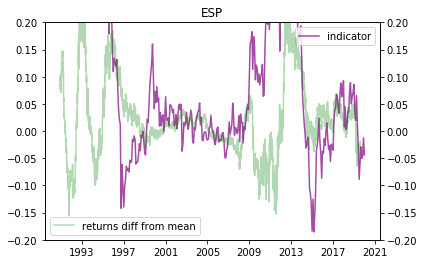

0.4130808844197985


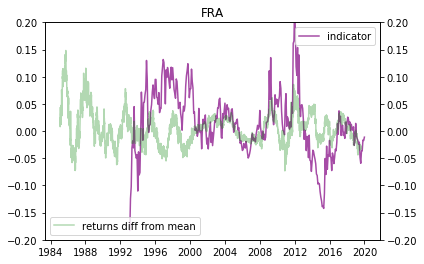

0.0671656614276212


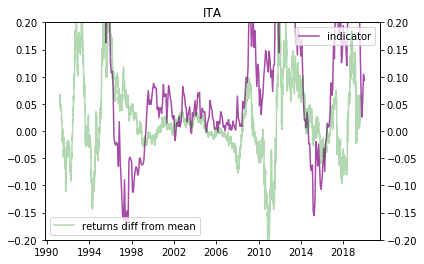

0.3916732403831258


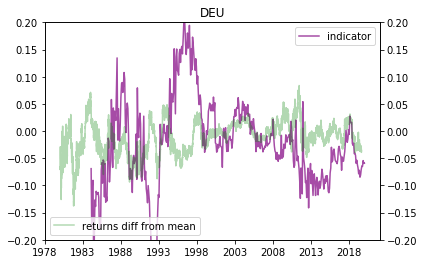

-0.03777947387742401


In [14]:
fshift = bond_one_year_rolling_returns.shift(-261)
for tf in tfs:
    print(tf)
    bond_one_year_rolling_returns.loc[tf[0]:tf[1],locs+['mean']].plot()
    signal_centered.loc[tf[0]:tf[1],:].plot()
    for country in locs:
        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()
        s = country + "signal"
        signal = signal_centered.loc[tf[0]:tf[1], s]
        ax1.plot(signal.to_timestamp(), color = 'purple', alpha=.7)
        returns_diff_from_global = fshift.loc[tf[0]:tf[1],country] - fshift.loc[tf[0]:tf[1],"mean"]
        ax2.plot(returns_diff_from_global.to_timestamp(), color = "green", alpha=.3)
        ax1.legend(["indicator"], loc = 'upper right')
        ax2.legend(["returns diff from mean"], loc="lower left")
        ax1.set(ylim=(-.2, .2))
        ax2.set(ylim=(-.2, .2))
        uf.align_yaxis(ax1, 0, ax2, 0)
        plt.title(country)
        plt.show()
        print(returns_diff_from_global.resample('M').last().corr(signal))

In [15]:
df = gi.generate_indicator_one(bond_risk_premium, curve_height)

['1986-01-01', '1995-01-01']


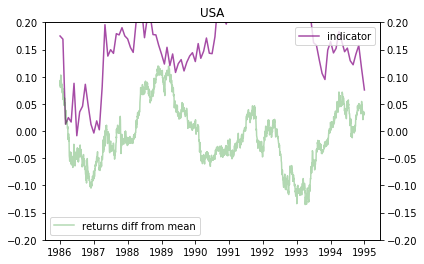

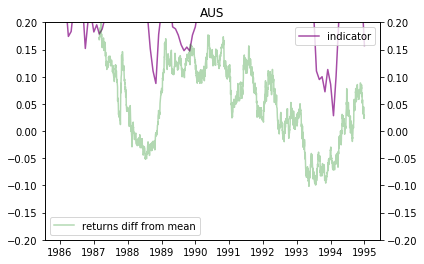

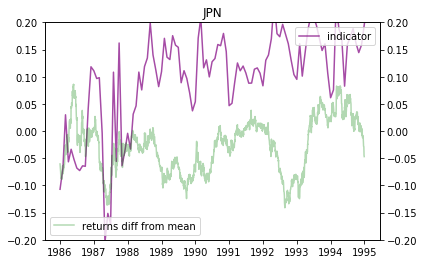

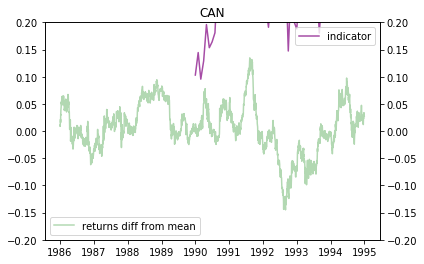

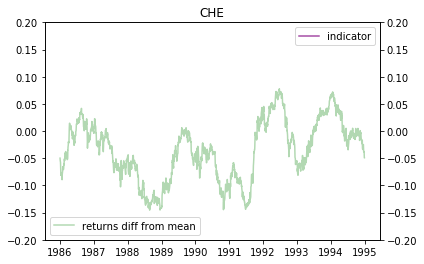

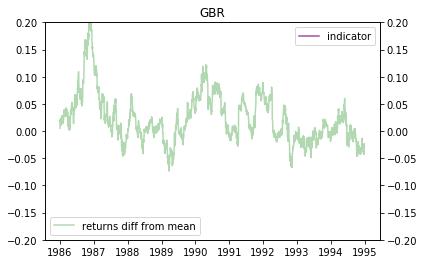

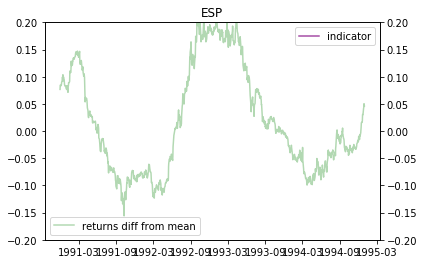

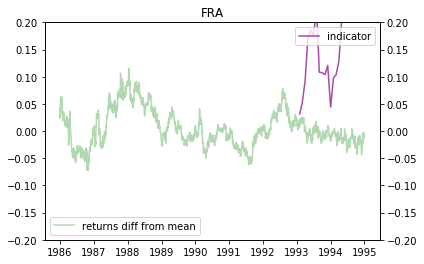

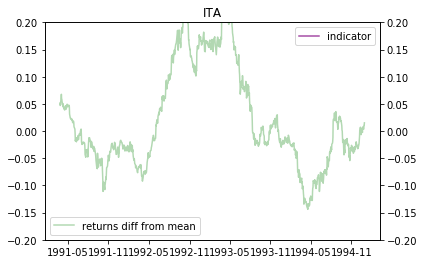

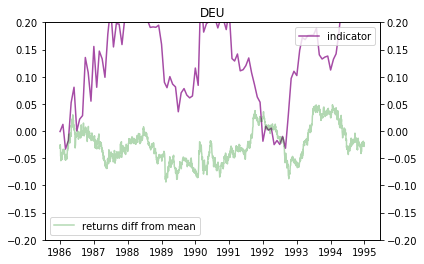

['1995-01-01', '2003-01-01']


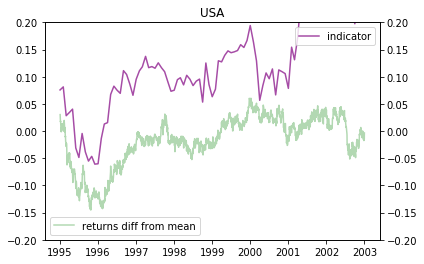

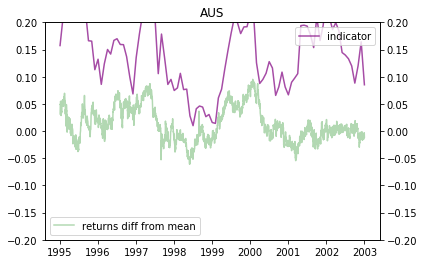

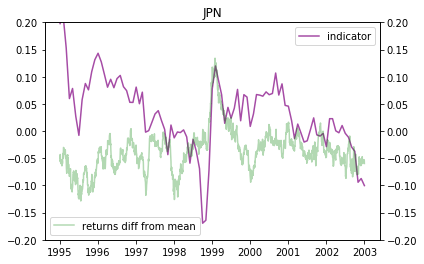

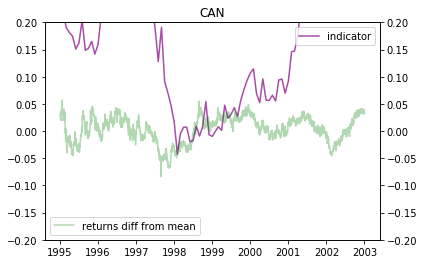

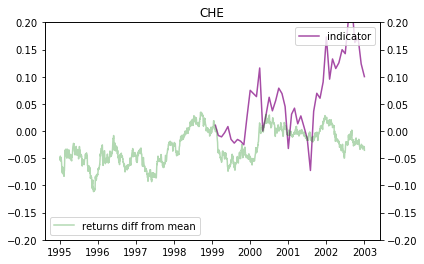

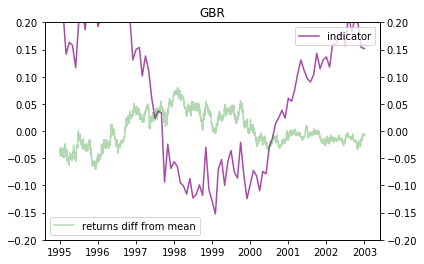

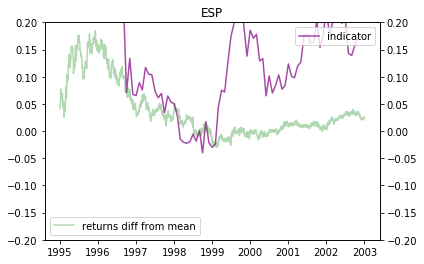

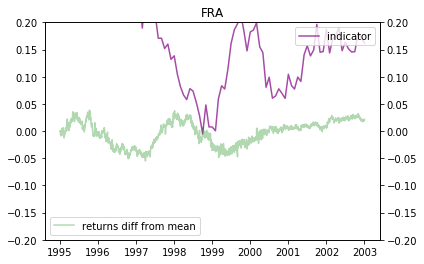

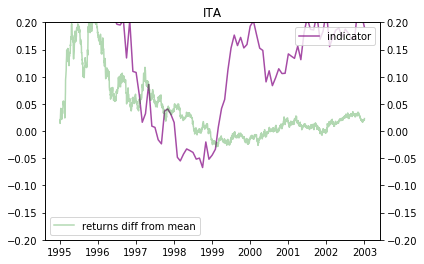

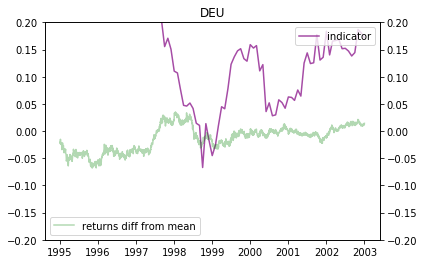

['2003-01-01', '2008-01-01']


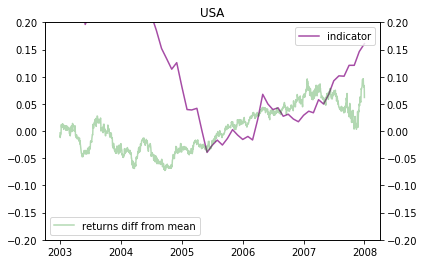

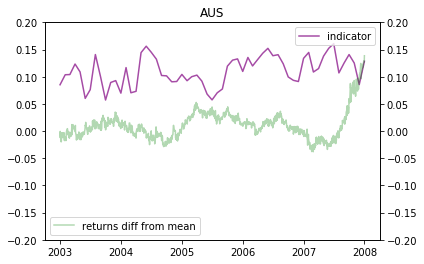

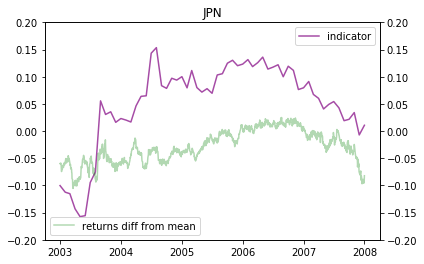

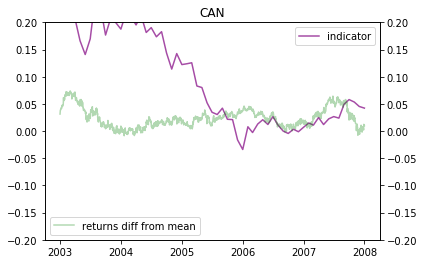

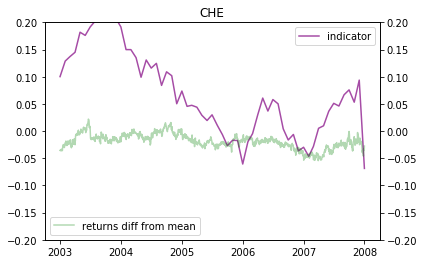

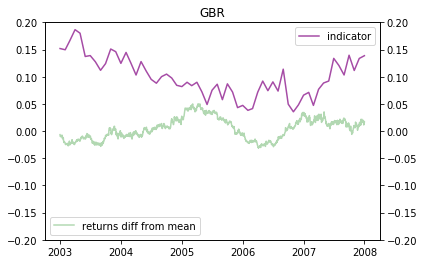

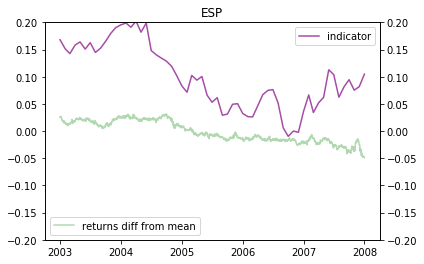

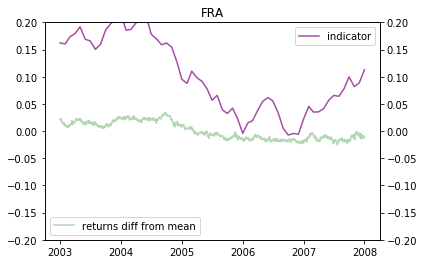

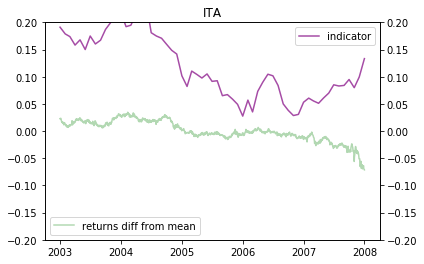

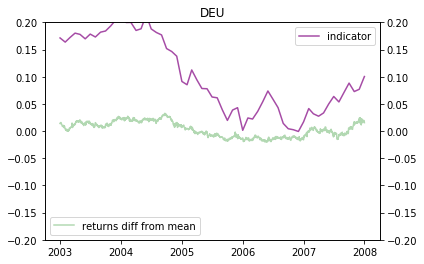

['2008-01-01', '2016-01-01']


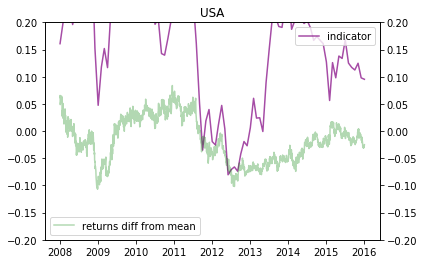

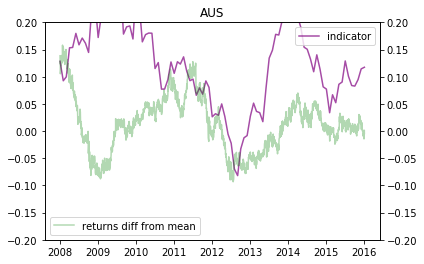

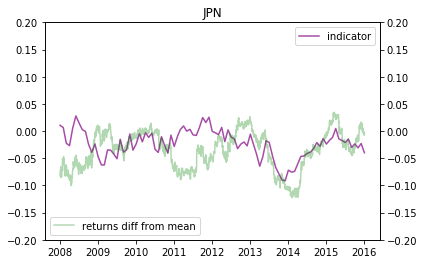

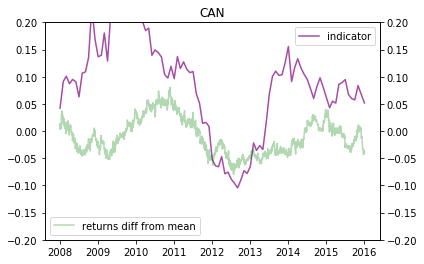

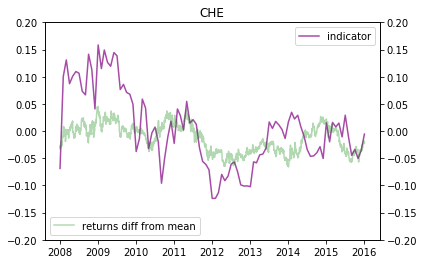

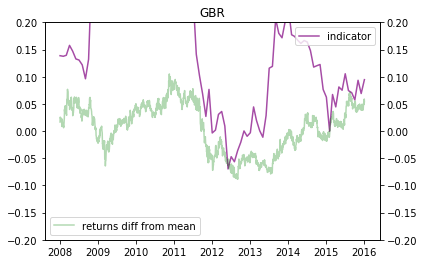

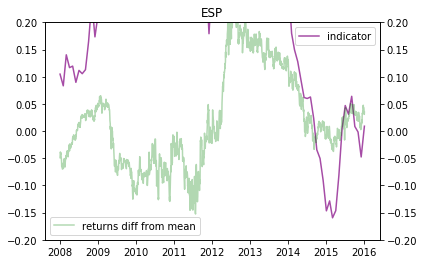

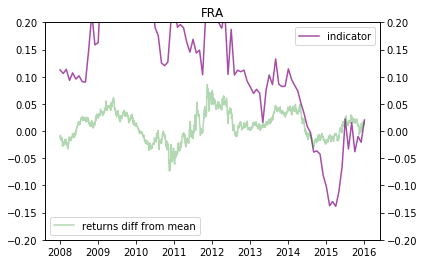

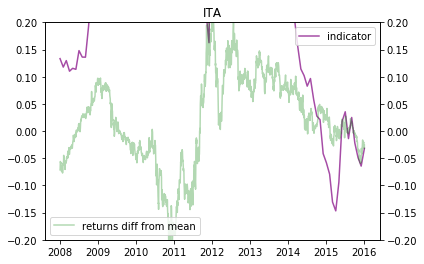

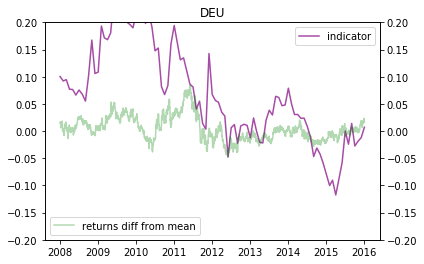

['2016-01-01', '2020-01-01']


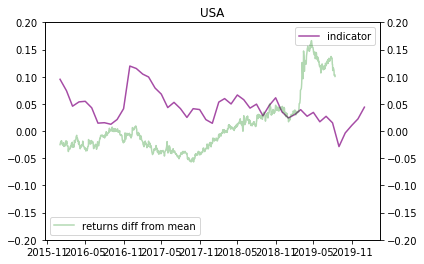

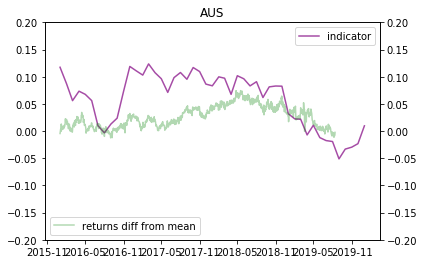

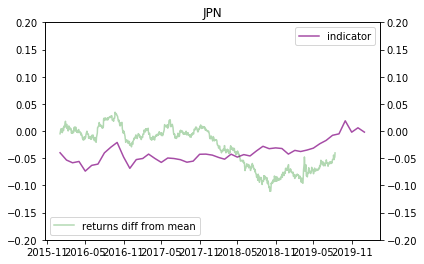

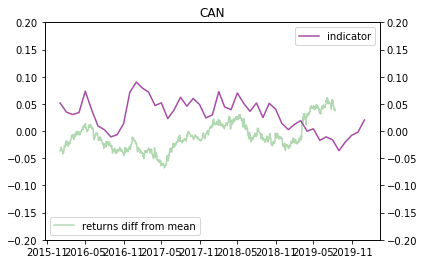

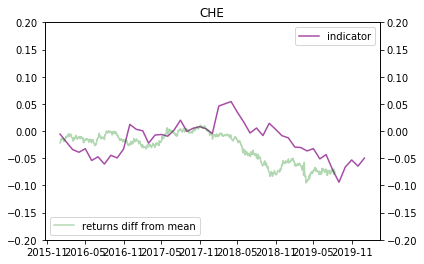

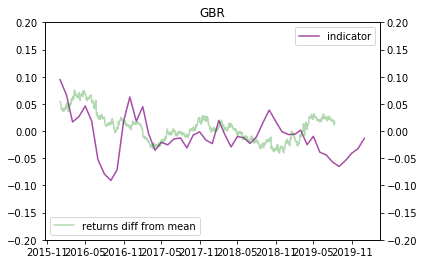

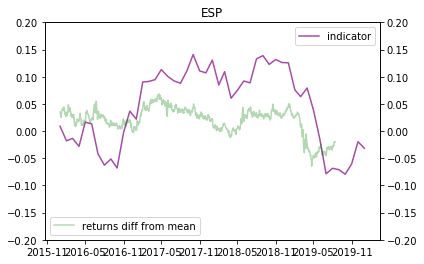

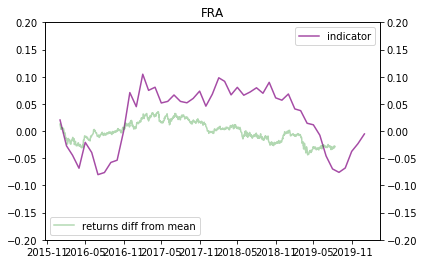

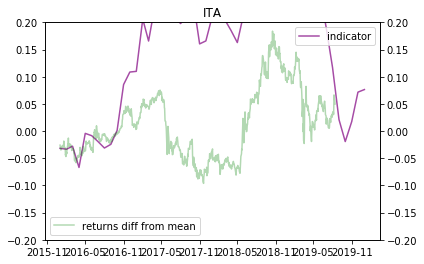

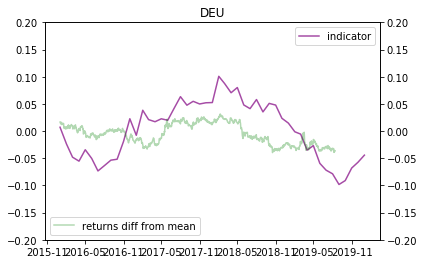

In [16]:
tf0 = ["1986-01-01", "1995-01-01"]
tf1 = ["1995-01-01", "2003-01-01"]
tf2 = ["2003-01-01", "2008-01-01"]
tf3 = ["2008-01-01", "2016-01-01"]
tf4 = ["2016-01-01", "2020-01-01"]
tfs = [tf0, tf1, tf2, tf3, tf4]

uf.plot_vs_returns(countryList, df, shifted_returns_diff_from_mean, tfs)

In [17]:
#M2 Construction testing
#idea - change in m2 can be approximated with average change in m1 and m3

m1_money_supply = dsPuller.ds_country_pull(lambda x: f'{x}CMS1..B', start_date, '', 'M')
m2_money_supply = dsPuller.ds_country_pull(lambda x: f'{x}CMS2..B', start_date, '', 'M',list(filter(lambda x: x !='AUS', countryList)))
m3_money_supply = dsPuller.ds_country_pull(lambda x: f'{x}CMS3..B', start_date, '', 'M',list(filter(lambda x: x !='USA', countryList)))


In [18]:
m2_proxy = .5 * m1_money_supply + .5 * m3_money_supply

In [19]:
m2_proxy["USA"] = m2_money_supply["USA"]

In [20]:
#using idea from paper - rolling three month divided by past year
indicator_two_attempt_one = change_in_money_supply = m2_proxy.rolling(3).mean() / m2_proxy.rolling(12).mean()

In [21]:
indicator_two_attempt_one = indicator_two_attempt_one - 1

['1986-01-01', '1995-01-01']


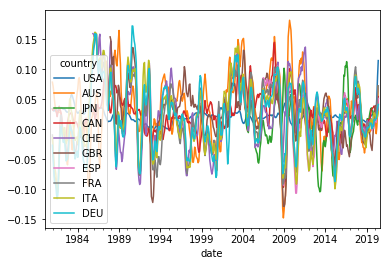

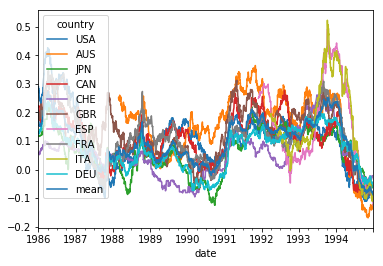

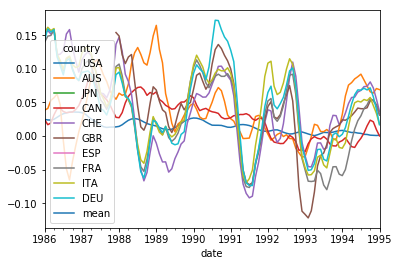

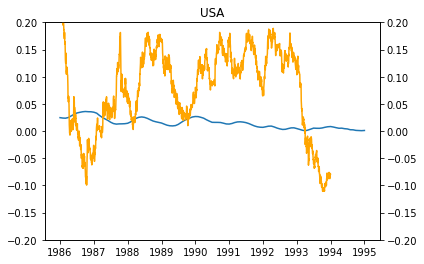

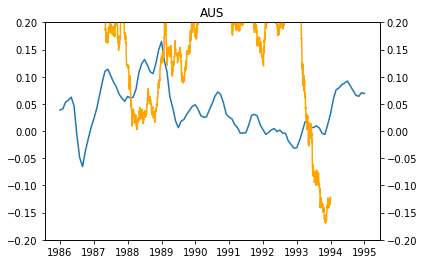

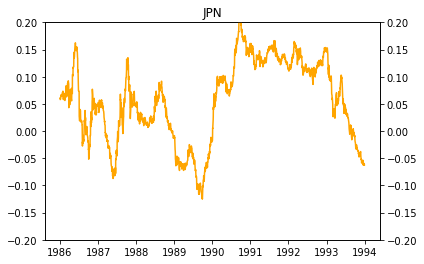

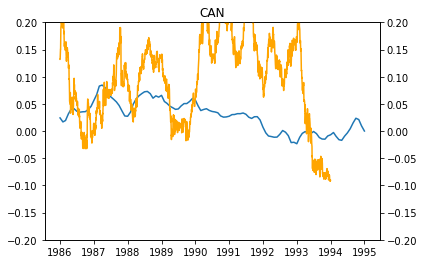

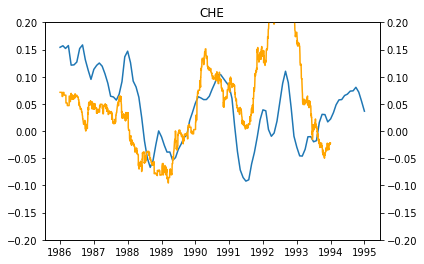

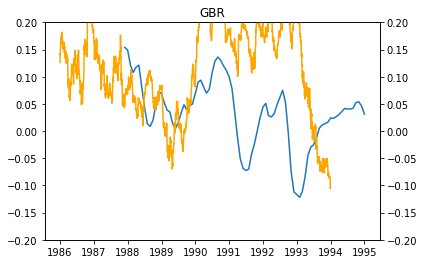

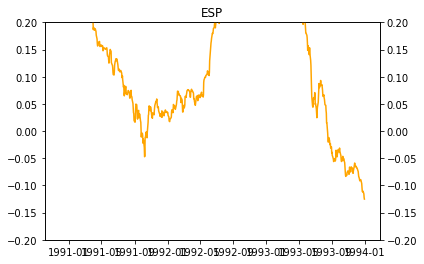

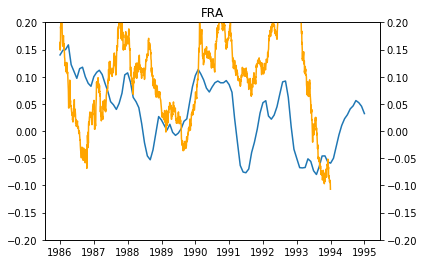

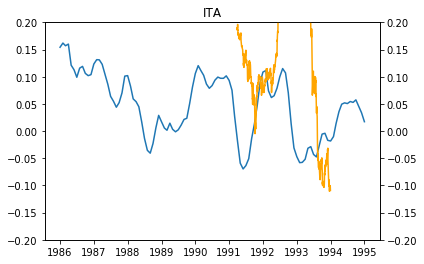

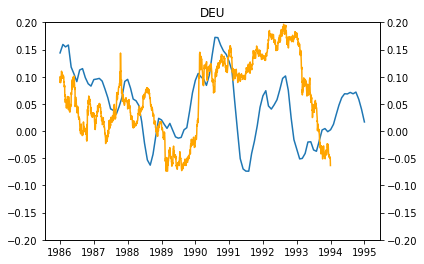

['1995-01-01', '2003-01-01']


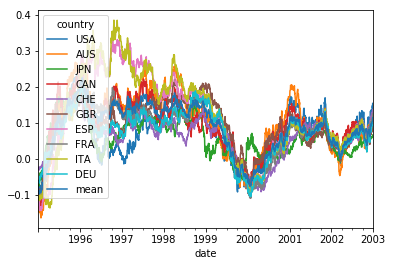

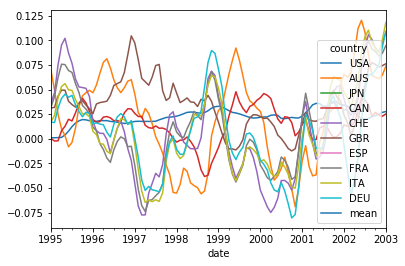

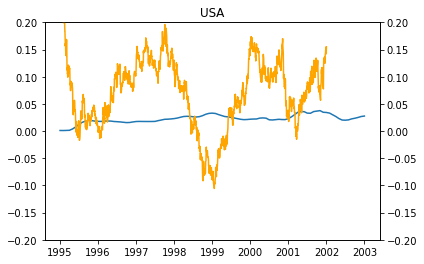

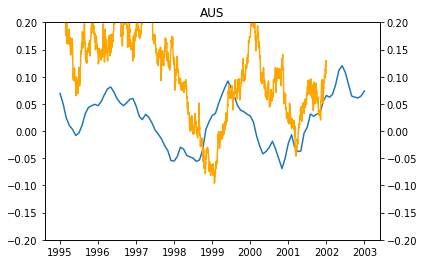

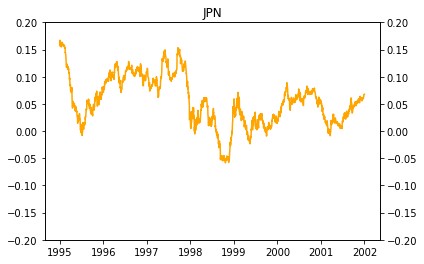

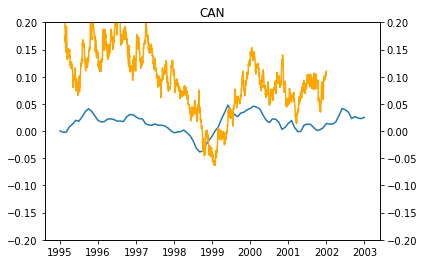

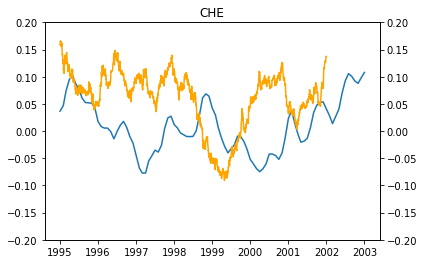

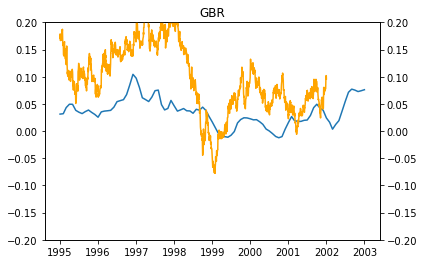

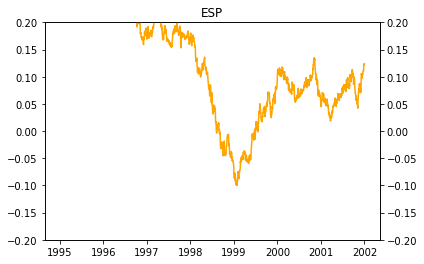

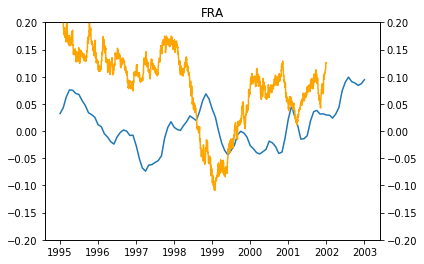

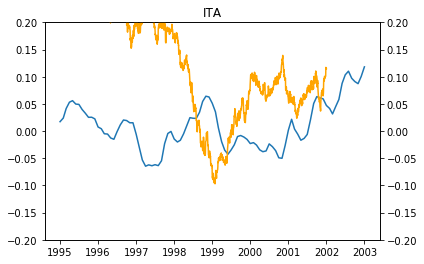

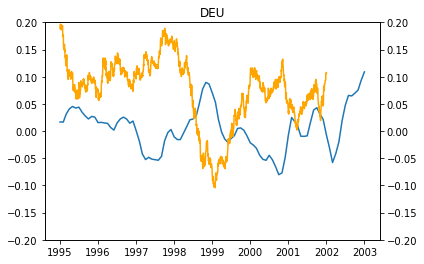

['2003-01-01', '2008-01-01']


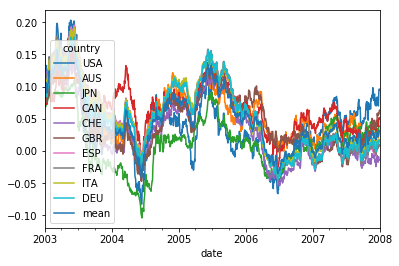

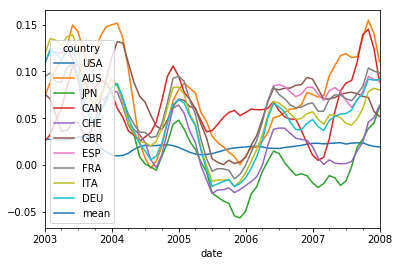

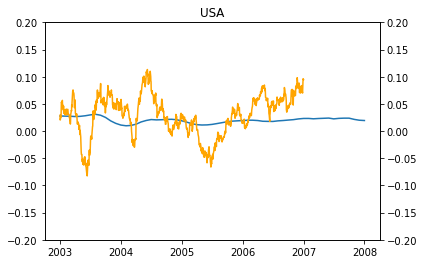

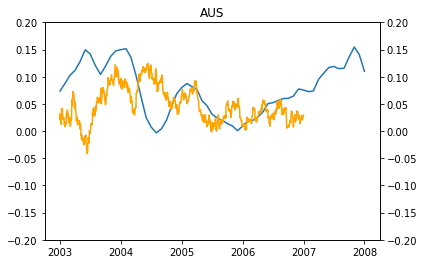

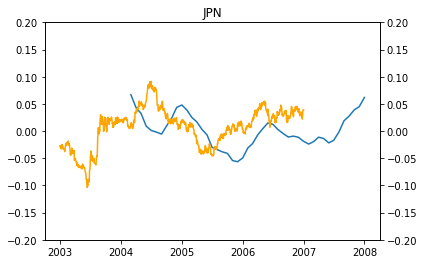

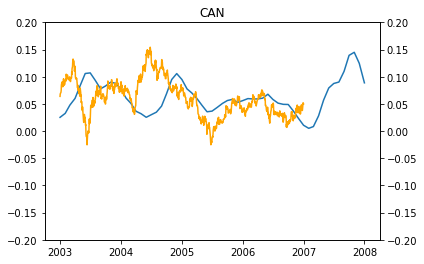

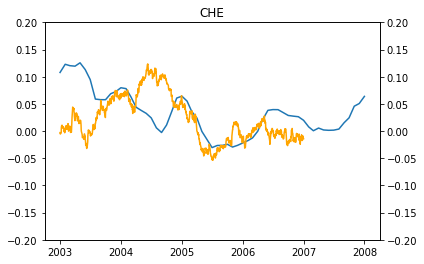

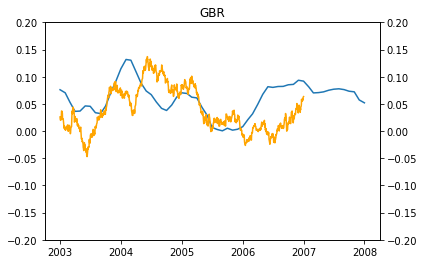

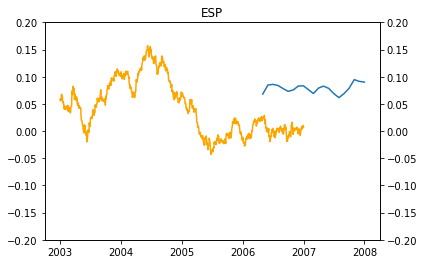

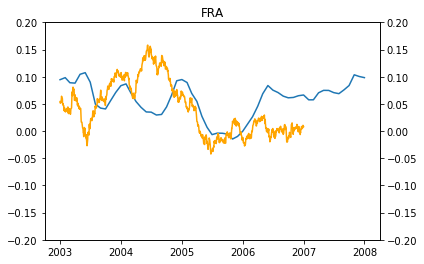

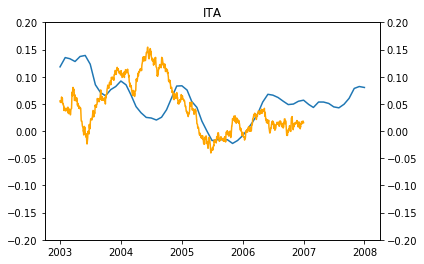

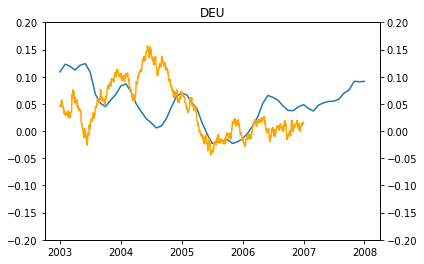

['2008-01-01', '2016-01-01']


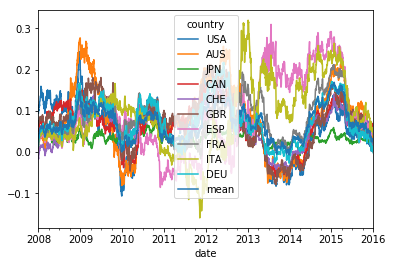

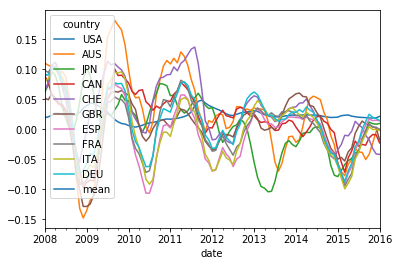

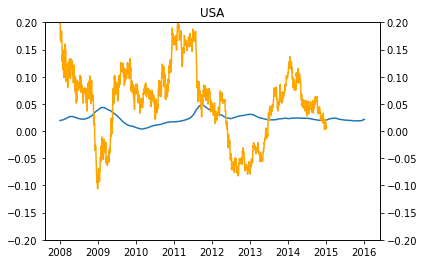

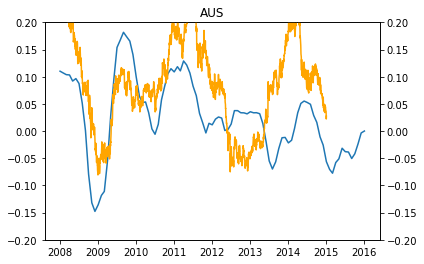

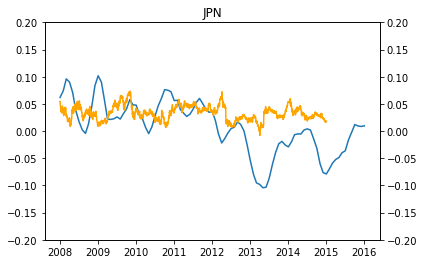

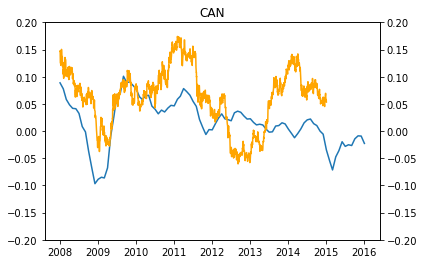

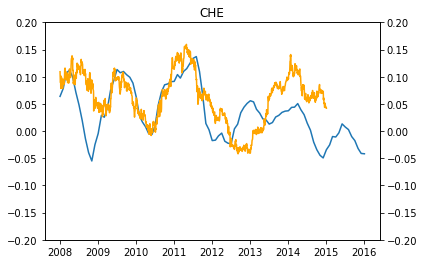

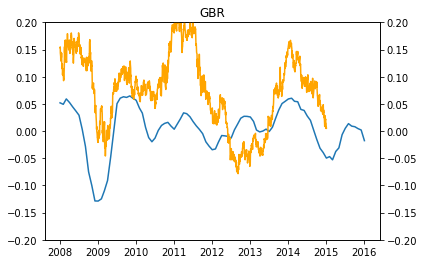

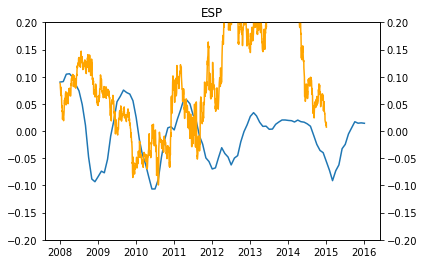

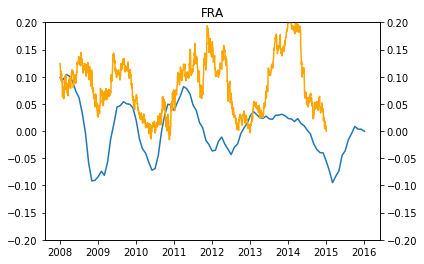

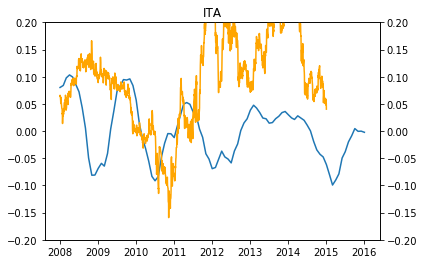

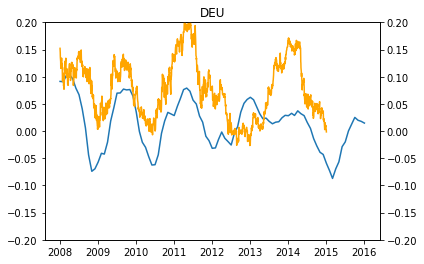

['2016-01-01', '2020-01-01']


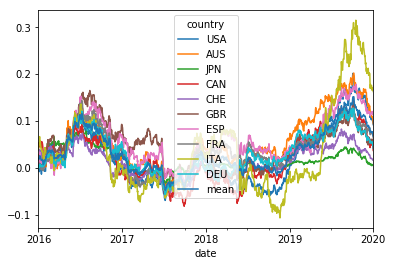

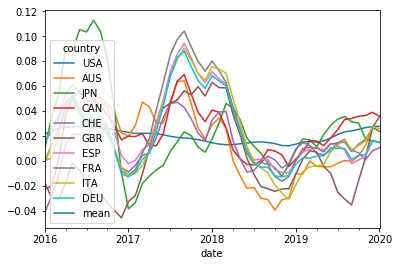

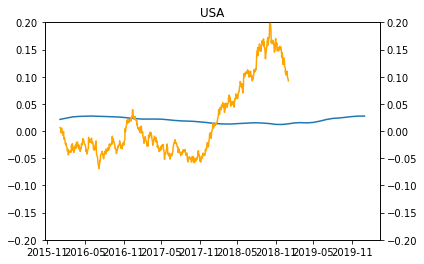

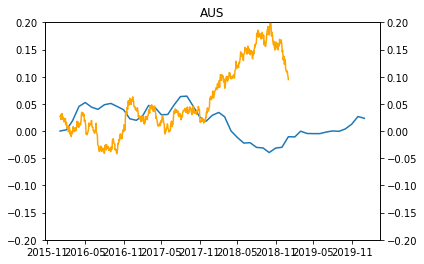

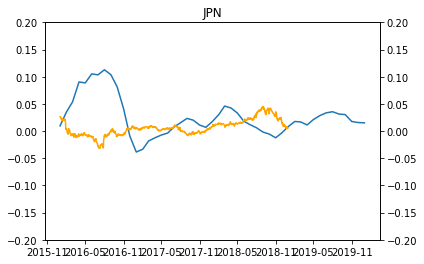

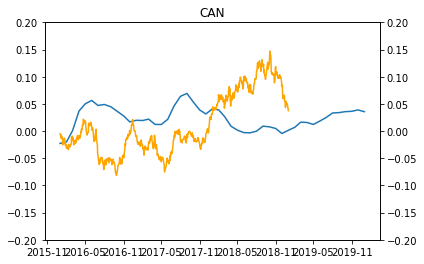

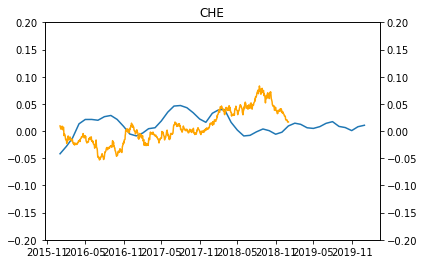

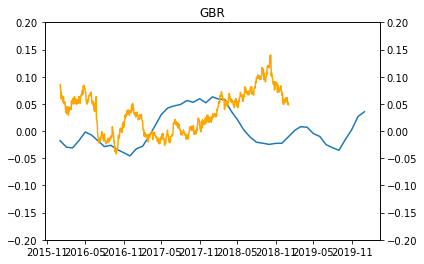

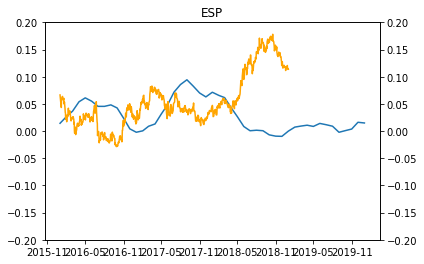

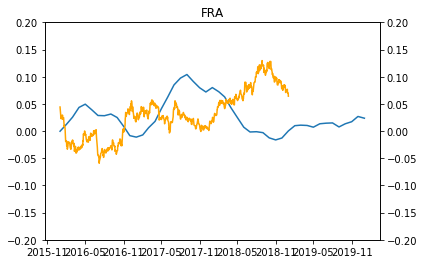

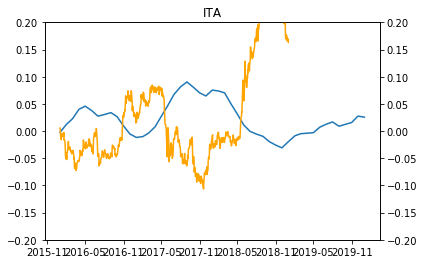

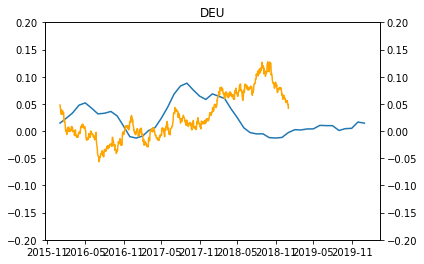

In [33]:
#Indicator 2 testing 0
#Now see if this indicator is worth anything at all - want to investigate change in money supply vs returns and yields

locs = countryList
indicator_two_attempt_one.loc[:,locs].plot()
tf0 = ["1986-01-01", "1995-01-01"]
tf1 = ["1995-01-01", "2003-01-01"]
tf2 = ["2003-01-01", "2008-01-01"]
tf3 = ["2008-01-01", "2016-01-01"]
tf4 = ["2016-01-01", "2020-01-01"]
tfs = [tf0, tf1, tf2, tf3, tf4]

for tf in tfs:
    print(tf)
    bond_one_year_rolling_returns.loc[tf[0]:tf[1],locs+['mean']].plot()
    indicator_two_attempt_one.loc[tf[0]:tf[1],locs+['mean']].plot()
    for country in locs:
        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()
        ax1.plot(indicator_two_attempt_one.loc[tf[0]:tf[1],country].to_timestamp())
        ax2.plot(bond_one_year_rolling_returns.loc[tf[0]:tf[1],country].shift(-261).to_timestamp(), color = "orange")
        plt.title(country)
        ax1.set(ylim=(-.2, .2))
        ax2.set(ylim=(-.2, .2))
        uf.align_yaxis(ax1, 0, ax2, 0)
        plt.show()

In [23]:
#idea 3)
#use currency appreciation (twi) to predict bond returns.
fxVsUSD = dsPuller.ds_country_pull(lambda x: f'{x}XRUSD.', start_date, '', 'M')
fxRealPrices_TrdWts = dsPuller.ds_country_pull(lambda x: f'{x}CXTR..F', start_date, '', 'M',['USA', 'AUS', 'JPN', 'CHE', 'GBR'])

In [34]:
relative_value = fxVsUSD
relative_value["GBR"] = 1 / fxVsUSD["GBR"]
relative_value
change_in_fx = relative_value.rolling(3).mean() / relative_value.shift(3).rolling(12).mean() - 1
change_in_fx

country       AUS       DEU       CAN       ESP       FRA       ITA       JPN  \
date                                                                            
1980-01       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1980-02       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1980-03       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1980-04       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1980-05       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1980-06       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1980-07       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1980-08       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1980-09       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1980-10       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1980-11       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1980-12       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1981-01       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1981-02       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1981-03 -0.025061  0.148626  0.020826  0.171104  0.150941  0.170163 -0.092119   
1981-04 -0.012428  0.161388  0.018908  0.183761  0.173702  0.201390 -0.061143   
1981-05 -0.001984  0.167197  0.016411  0.183504  0.193098  0.222387 -0.024866   
1981-06  0.010053  0.201527  0.018735  0.201218  0.230657  0.259712  0.013599   
1981-07  0.017992  0.234789  0.024194  0.223730  0.264408  0.286596  0.054070   
1981-08  0.019158  0.243724  0.028428  0.234543  0.269855  0.289497  0.077137   
1981-09  0.015819  0.208754  0.023698  0.209476  0.233856  0.251975  0.082771   
1981-10  0.014321  0.144498  0.017016  0.169823  0.184967  0.204662  0.077351   
1981-11  0.010931  0.069326  0.002541  0.118922  0.124615  0.148690  0.057516   
1981-12  0.013507  0.031151 -0.004324  0.097542  0.102501  0.124216  0.034867   
1982-01  0.020250  0.021710 -0.009551  0.085082  0.091481  0.107829  0.015649   
1982-02  0.037515  0.031068 -0.002257  0.086396  0.096791  0.106994  0.030497   
1982-03  0.058519  0.038098  0.008369  0.096248  0.103524  0.110081  0.060820   
1982-04  0.073567  0.042207  0.017257  0.106242  0.108762  0.114744  0.080583   
1982-05  0.075498  0.025416  0.021710  0.099182  0.091323  0.099882  0.070305   
1982-06  0.076751  0.022217  0.034858  0.097572  0.097445  0.097659  0.072323   
...           ...       ...       ...       ...       ...       ...       ...   
2018-03 -0.025092 -0.083281 -0.025508 -0.083288 -0.083295 -0.083288 -0.034765   
2018-04 -0.008500 -0.074563 -0.012795 -0.074576 -0.074579 -0.074576 -0.041062   
2018-05  0.008757 -0.048889 -0.002033 -0.048896 -0.048896 -0.048895 -0.031851   
2018-06  0.021999 -0.019481  0.006026 -0.019506 -0.019503 -0.019506 -0.014803   
2018-07  0.036672  0.008134  0.021023  0.008114  0.008113  0.008114 -0.001731   
2018-08  0.046893  0.021542  0.030340  0.021532  0.021532  0.021532  0.003984   
2018-09  0.059881  0.025585  0.029068  0.025579  0.025577  0.025579  0.010577   
2018-10  0.069564  0.032895  0.022958  0.032887  0.032887  0.032887  0.015223   
2018-11  0.066522  0.036460  0.024198  0.036459  0.036460  0.036459  0.021340   
2018-12  0.059335  0.042756  0.029442  0.042769  0.042773  0.042769  0.021086   
2019-01  0.049050  0.042721  0.034279  0.042734  0.042734  0.042734  0.009653   
2019-02  0.049768  0.040344  0.031556  0.040352  0.040353  0.040352  0.000532   
2019-03  0.048342  0.039406  0.025526  0.039418  0.039422  0.039418 -0.002330   
2019-04  0.041256  0.039109  0.021764  0.039135  0.039139  0.039135  0.007192   
2019-05  0.042703  0.037041  0.024175  0.037055  0.037055  0.037055  0.003795   
2019-06  0.041564  0.029901  0.019281  0.029913  0.029908  0.029913 -0.009274   
2019-07  0.041215  0.023090  0.

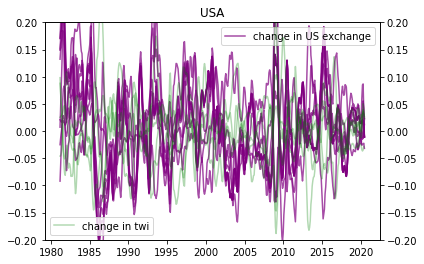

-0.8430804604244346


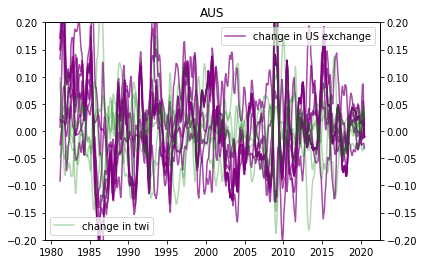

-0.8447430954225463


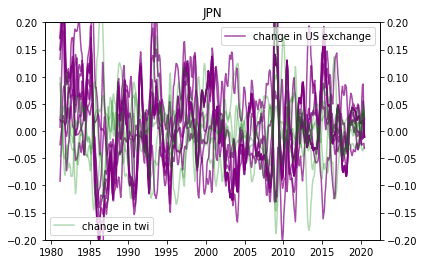

-0.8928792034311404


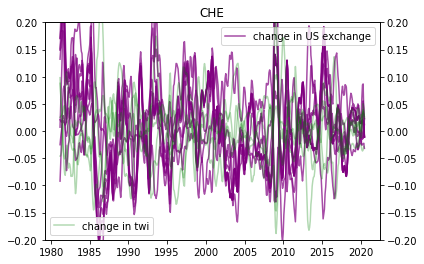

-0.6539278492652969


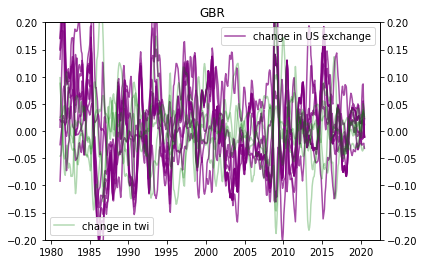

-0.6221764020850556


In [36]:
#fx isn't perfectly in line with twi so need to proxy
for country in ['USA', 'AUS', 'JPN', 'CHE', 'GBR']:
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(change_in_fx.to_timestamp(), color = 'purple', alpha=.7)
    ax2.plot(change_in_twi.to_timestamp(), color = "green", alpha=.3)
    ax1.legend(["change in US exchange"], loc = 'upper right')
    ax2.legend(["change in twi"], loc="lower left")
    ax1.set(ylim=(-.2, .2))
    ax2.set(ylim=(-.2, .2))
    uf.align_yaxis(ax1, 0, ax2, 0)
    plt.title(country)
    plt.show()
    print(change_in_fx[country].corr(change_in_twi[country]))


In [27]:
indicator_one_b_risk = bond_risk_premium

indicator_one_b_risk["mean"] = indicator_one_b_risk.mean(axis = 1)

for country in countryList:
    s = country + "diff"
    indicator_one_b_risk[s] = indicator_one_b_risk[country] - indicator_one_b_risk["mean"] 
    
#rolling average window size
n = 4
for country in countryList:
    s1 = country + "diff"
    s2 = country + "avg" + "diff"
    indicator_one_b_risk[s2] = indicator_one_b_risk[s1].shift(1).rolling(n * 12, min_periods = 12*n).mean()
    #indicator_one_b_risk[s2] = indicator_one_b_risk[s1].shift(1).rolling(n * 12, min_periods = 12*n).median()

for country in countryList:
    s0 = country + "norm"
    s1 = country + "avg" + "diff"
    indicator_one_b_risk[s0] = indicator_one_b_risk["mean"] + indicator_one_b_risk[s1]

'''for country in countryList:
    s0 = country + "signal" 
    s1 = country + "norm"
    indicator_one_b_risk[s0] = indicator_one_b_risk[country] - indicator_one_b_risk[s1]'''

for country in countryList:
    s0 = country + "signal"
    s1 = country + "norm"
    indicator_one_b_risk[s0] = .4 * (indicator_one_b_risk[country] - indicator_one_b_risk["mean"]) + .6 * (indicator_one_b_risk[country] - indicator_one_b_risk[s1])
    
print(indicator_one_b_risk.columns)    
indicator_one_b_signals = list(indicator_one_b_risk.columns)[-10:]
print(indicator_one_b_signals)
print(indicator_one_b_risk.loc[:, indicator_one_b_signals].max().max())
print(indicator_one_b_risk.loc[:, indicator_one_b_signals].min().min())

#indicator_one_b_risk.loc[:, ["USA", "mean", "USAdiff", "USAavgdiff", "USAnorm", "USAsignal"]] 
    

indicator_one_b_height = curve_height

'''/ (bond_risk_premium.max().max() - bond_risk_premium.min().min()) + \
                    curve_height / (curve_height.max().max() - curve_height.min().min())'''

indicator_one_b_height["mean"] = indicator_one_b_height.mean(axis = 1)

for country in countryList:
    s = country + "diff"
    indicator_one_b_height[s] = indicator_one_b_height[country] - indicator_one_b_height["mean"] 
    
#rolling average window size

for country in countryList:
    s1 = country + "diff"
    s2 = country + "avg" + "diff"
    indicator_one_b_height[s2] = indicator_one_b_height[s1].shift(1).rolling(n * 12, min_periods = 12*n).mean()
    #indicator_one_b_height[s2] = indicator_one_b_height[s1].shift(1).rolling(n * 12, min_periods = 12*n).median()
    
for country in countryList:
    s0 = country + "norm"
    s1 = country + "avg" + "diff"
    indicator_one_b_height[s0] = indicator_one_b_height["mean"] + indicator_one_b_height[s1]

'''for country in countryList:
    s0 = country + "signal" 
    s1 = country + "norm"
    indicator_one_b_height[s0] = indicator_one_b_height[country] - indicator_one_b_height[s1]'''

for country in countryList:
    s0 = country + "signal"
    s1 = country + "norm"
    indicator_one_b_height[s0] = .4 * (indicator_one_b_height[country] - indicator_one_b_height['mean']) + .6 * (indicator_one_b_height[country] - indicator_one_b_height[s1])


print(indicator_one_b_height.loc[:, indicator_one_b_signals].max().max())
print(indicator_one_b_height.loc[:, indicator_one_b_signals].min().min())

#scaling each component by its size or range - could consider other scaling methods like std

signal = indicator_one_b_risk.loc[:, indicator_one_b_signals] / (indicator_one_b_risk.loc[:, indicator_one_b_signals].max().max() - indicator_one_b_risk.loc[:, indicator_one_b_signals].min().min()) + \
        indicator_one_b_height.loc[:, indicator_one_b_signals] / (indicator_one_b_height.loc[:, indicator_one_b_signals].max().max() - indicator_one_b_height.loc[:, indicator_one_b_signals].min().min())

signal["mean"] = signal.mean(axis = 1)
signal_centered = signal.subtract(signal["mean"], axis = 0)
signal_centered

Index(['AUS', 'DEU', 'CAN', 'ESP', 'FRA', 'ITA', 'JPN', 'CHE', 'GBR', 'USA',
       'mean', 'USAdiff', 'AUSdiff', 'JPNdiff', 'CANdiff', 'CHEdiff',
       'GBRdiff', 'ESPdiff', 'FRAdiff', 'ITAdiff', 'DEUdiff', 'USAavgdiff',
       'AUSavgdiff', 'JPNavgdiff', 'CANavgdiff', 'CHEavgdiff', 'GBRavgdiff',
       'ESPavgdiff', 'FRAavgdiff', 'ITAavgdiff', 'DEUavgdiff', 'USAnorm',
       'AUSnorm', 'JPNnorm', 'CANnorm', 'CHEnorm', 'GBRnorm', 'ESPnorm',
       'FRAnorm', 'ITAnorm', 'DEUnorm', 'USAsignal', 'AUSsignal', 'JPNsignal',
       'CANsignal', 'CHEsignal', 'GBRsignal', 'ESPsignal', 'FRAsignal',
       'ITAsignal', 'DEUsignal'],
      dtype='object', name='country')
['USAsignal', 'AUSsignal', 'JPNsignal', 'CANsignal', 'CHEsignal', 'GBRsignal', 'ESPsignal', 'FRAsignal', 'ITAsignal', 'DEUsignal']
2.3978465160905253
-1.4962297859317497
6.03854196666253
-1.7985758604253699


country  USAsignal  AUSsignal  JPNsignal  CANsignal  CHEsignal  GBRsignal  \
date                                                                        
1980-01        NaN        NaN        NaN        NaN        NaN        NaN   
1980-02        NaN        NaN        NaN        NaN        NaN        NaN   
1980-03        NaN        NaN        NaN        NaN        NaN        NaN   
1980-04        NaN        NaN        NaN        NaN        NaN        NaN   
1980-05        NaN        NaN        NaN        NaN        NaN        NaN   
1980-06        NaN        NaN        NaN        NaN        NaN        NaN   
1980-07        NaN        NaN        NaN        NaN        NaN        NaN   
1980-08        NaN        NaN        NaN        NaN        NaN        NaN   
1980-09        NaN        NaN        NaN        NaN        NaN        NaN   
1980-10        NaN        NaN        NaN        NaN        NaN        NaN   
1980-11        NaN        NaN        NaN        NaN        NaN        NaN   
1980-12        NaN        NaN        NaN        NaN        NaN        NaN   
1981-01        NaN        NaN        NaN        NaN        NaN        NaN   
1981-02        NaN        NaN        NaN        NaN        NaN        NaN   
1981-03        NaN        NaN        NaN        NaN        NaN        NaN   
1981-04        NaN        NaN        NaN        NaN        NaN        NaN   
1981-05        NaN        NaN        NaN        NaN        NaN        NaN   
1981-06        NaN        NaN        NaN        NaN        NaN        NaN   
1981-07        NaN        NaN        NaN        NaN        NaN        NaN   
1981-08        NaN        NaN        NaN        NaN        NaN        NaN   
1981-09        NaN        NaN        NaN        NaN        NaN        NaN   
1981-10        NaN        NaN        NaN        NaN        NaN        NaN   
1981-11        NaN        NaN        NaN        NaN        NaN        NaN   
1981-12        NaN        NaN        NaN        NaN        NaN        NaN   
1982-01        NaN        NaN        NaN        NaN        NaN        NaN   
1982-02        NaN        NaN        NaN        NaN        NaN        NaN   
1982-03        NaN        NaN        NaN        NaN        NaN        NaN   
1982-04        NaN        NaN        NaN        NaN        NaN        NaN   
1982-05        NaN        NaN        NaN        NaN        NaN        NaN   
1982-06        NaN        NaN        NaN        NaN        NaN        NaN   
...            ...        ...        ...        ...        ...        ...   
2018-03   0.006428   0.041937  -0.153687  -0.017512  -0.032489  -0.089057   
2018-04   0.015219   0.026441  -0.121118  -0.002963  -0.006648  -0.096636   
2018-05   0.026338   0.057130  -0.140197   0.024445  -0.040716  -0.085953   
2018-06   0.016500   0.051406  -0.132584   0.002083  -0.062317  -0.088649   
2018-07   0.003882   0.040664  -0.129830  -0.010208  -0.080446  -0.095208   
2018-08  -0.004342   0.032670  -0.136255  -0.007745  -0.087240  -0.097342   
2018-09  -0.022484   0.005417  -0.116529  -0.031786  -0.094995  -0.056531   
2018-10  -0.015996   0.011159  -0.141181  -0.015879  -0.085895  -0.045674   
2018-11   0.002450   0.013848  -0.138631  -0.028213  -0.098681  -0.071092   
2018-12  -0.015320   0.028411  -0.125304  -0.048279  -0.098718  -0.080455   
2019-01  -0.017356  -0.019263  -0.121670  -0.049680  -0.087525  -0.070331   
2019-02   0.001327  -0.020835  -0.102603  -0.026548  -0.096994  -0.058657   
2019-03   0.011955  -0.023397  -0.105489  -0.020475  -0.098349  -0.049589   
2019-04   0.020295  -0.035682  -0.075845  -0.019954  -0.080153  -0.057704   
2019-05   0.024694  -0.019428  -0.075043  -0.019112  -0.078356  -0.041642   
2019-06   0.025458  -0.021642  -0.037111  -0.020027  -0.074405  -0.051710   
2019-07   0.057595  -0.009587  -0.009655   0.009827  -0.044985  -0.036651   
2019-08   0.060504   0.005678   0.021185   0.021747  -0.061623  -0.036494   
2019-09   0.036093  -0.002741   0.055688   0.027801  -0.059126  -0.015371

In [37]:
change_in_twi = fxRealPrices_TrdWts.rolling(3).mean() / fxRealPrices_TrdWts.shift(3).rolling(12).mean() - 1

In [38]:
GBR_twi_proxy_pt1 = (1 / fxVsUSD["GBR"] * fxVsUSD["CHE"] * fxRealPrices_TrdWts["CHE"])
change_in_proxy_GBR = GBR_twi_proxy_pt1.rolling(3).mean() / GBR_twi_proxy_pt1.shift(3).rolling(12).mean() - 1
change_in_proxy_GBR
GBR_twi_proxy_pt2 = (1 / fxVsUSD["GBR"] * fxVsUSD["CHE"])
change_in_proxy_GBR_adj = GBR_twi_proxy_pt2.rolling(3).mean() / GBR_twi_proxy_pt2.shift(3).rolling(12).mean() - 1
change_in_proxy_GBR_better = .97 * change_in_proxy_GBR - .03 * change_in_proxy_GBR_adj

print(change_in_proxy_GBR_better.corr(change_in_twi["GBR"]))


0.969302998689307


In [39]:
CHE_twi_proxy_pt1 = (1 / fxVsUSD["CHE"] * fxVsUSD["GBR"] * fxRealPrices_TrdWts["GBR"])
change_in_proxy_CHE = CHE_twi_proxy_pt1.rolling(3).mean() / CHE_twi_proxy_pt1.shift(3).rolling(12).mean() - 1
CHE_twi_proxy_pt2 = (1 / fxVsUSD["CHE"] * fxVsUSD["GBR"])
change_in_proxy_CHE_adj = CHE_twi_proxy_pt2.rolling(3).mean() / CHE_twi_proxy_pt2.shift(3).rolling(12).mean() - 1
change_in_proxy_CHE_better = .9 * change_in_proxy_CHE + .1 * change_in_proxy_CHE_adj

print(change_in_proxy_CHE_better.corr(change_in_twi["CHE"]))

0.9614093872733076


In [40]:
twi_proxy = fxRealPrices_TrdWts
#Canada most similar to US by top 15 trading partners but has US making up 75% of exports 
#Euro countries (Italy, Spain, France, Germany) most similar to Switzerland construction
#Idea - can proxy change in twi by converting local currency to USD or CHE and tracking change in those twi's
#assumption - "similar" countries trade with the same partners in relatively similar proportions 
#in actuality, need to subtract off a bit accounting for countries trading with themselves and add on effect of bilateral exchange rate

twi_proxy["ITA"] = (1 / fxVsUSD["ITA"] * fxVsUSD["CHE"] * fxRealPrices_TrdWts["CHE"])
twi_proxy["FRA"] = (1 / fxVsUSD["FRA"] * fxVsUSD["CHE"] * fxRealPrices_TrdWts["CHE"])
twi_proxy["DEU"] = (1 / fxVsUSD["DEU"] * fxVsUSD["CHE"] * fxRealPrices_TrdWts["CHE"])
twi_proxy["ESP"] = (1 / fxVsUSD["ESP"] * fxVsUSD["CHE"] * fxRealPrices_TrdWts["CHE"])
twi_proxy["CAN"] = (1 / fxVsUSD["CAN"] * fxRealPrices_TrdWts["USA"])
change_in_twi_proxy = twi_proxy.rolling(3).mean() / twi_proxy.shift(3).rolling(12).mean() - 1
change_in_twi_proxy 


country       AUS       JPN       CHE       GBR       USA       ITA       FRA  \
date                                                                            
1980-01       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1980-02       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1980-03       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1980-04       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1980-05       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1980-06       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1980-07       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1980-08       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1980-09       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1980-10       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1980-11       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1980-12       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1981-01       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1981-02       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1981-03  0.025522  0.098250 -0.045993  0.087864       NaN -0.077277 -0.061514   
1981-04  0.027121  0.068664 -0.045566  0.065683       NaN -0.086854 -0.065148   
1981-05  0.028709  0.038226 -0.039530  0.047177       NaN -0.093416 -0.070779   
1981-06  0.030285  0.013509 -0.030596  0.028621       NaN -0.097750 -0.075782   
1981-07  0.033691 -0.013697 -0.012137 -0.000404       NaN -0.091697 -0.074894   
1981-08  0.038905 -0.034763  0.004936 -0.032408       NaN -0.080799 -0.065530   
1981-09  0.045901 -0.046114  0.017110 -0.062397       NaN -0.068270 -0.053287   
1981-10  0.046839 -0.051161  0.039782 -0.077499       NaN -0.066141 -0.049133   
1981-11  0.041802 -0.048206  0.078377 -0.081327       NaN -0.070019 -0.048895   
1981-12  0.030886 -0.037891  0.104650 -0.064937       NaN -0.077191 -0.057795   
1982-01  0.020595 -0.026203  0.109376 -0.046236       NaN -0.074882 -0.059788   
1982-02  0.010905 -0.035874  0.093093 -0.033283       NaN -0.070992 -0.061275   
1982-03  0.001789 -0.058135  0.086163 -0.026917       NaN -0.067400 -0.061044   
1982-04 -0.005340 -0.068082  0.071164 -0.022556       NaN -0.065058 -0.059580   
1982-05 -0.010515 -0.059315  0.049377 -0.019933       NaN -0.060117 -0.052508   
1982-06 -0.013759 -0.060998  0.017607 -0.014274       NaN -0.054931 -0.054227   
...           ...       ...       ...       ...       ...       ...       ...   
2018-03 -0.016286 -0.017130 -0.025102  0.021696 -0.042364  0.022546  0.022553   
2018-04 -0.019812 -0.009183 -0.024214  0.024612 -0.036460  0.019921  0.019925   
2018-05 -0.024707 -0.006811 -0.032635  0.023265 -0.019891  0.011503  0.011504   
2018-06 -0.030982 -0.009883 -0.030410  0.017920  0.000952  0.002815  0.002812   
2018-07 -0.034172 -0.003335 -0.021527  0.007720  0.020837 -0.003756 -0.003756   
2018-08 -0.034252  0.008243 -0.005390  0.002326  0.030414 -0.004032 -0.004032   
2018-09 -0.031205  0.013924  0.010146  0.000339  0.032578 -0.001661 -0.001659   
2018-10 -0.028321  0.016158  0.018934  0.001137  0.035511 -0.003316 -0.003316   
2018-11 -0.025601  0.011615  0.017879  0.002981  0.039086 -0.005655 -0.005656   
2018-12 -0.023030  0.011841  0.011387 -0.003877  0.041260 -0.010280 -0.010284   
2019-01 -0.022707  0.018541  0.010875 -0.008658  0.036527 -0.013212 -0.013213   
2019-02 -0.024656  0.018225  0.006942 -0.008621  0.027230 -0.015515 -0.015515   
2019-03 -0.028909  0.012812 -0.000171  0.004214  0.019062 -0.019365 -0.019368   
2019-04 -0.031156 -0.002640 -0.007100  0.011235  0.016451 -0.022541 -0.022545   
2019-05 -0.031384  0.001451 -0.006504  0.011396  0.016102 -0.022592 -0.022592   
2019-06 -0.029566  0.014500 -0.001959 -0.000449  0.012909 -0.019601 -0.019597   
2019-07 -0.028506  0.025620  0.

In [41]:
USA_to_fx = 1 / fxVsUSD

change_in_USA_to_fx = USA_to_fx.rolling(3).mean() / USA_to_fx.shift(3).rolling(12).mean() - 1
CHE_to_fx = (1 / fxVsUSD).mul(fxVsUSD["CHE"], axis=0)
change_in_CHE_to_fx = CHE_to_fx.rolling(3).mean() / CHE_to_fx.shift(3).rolling(12).mean() - 1

#GBR_twi_proxy_pt2 = (1 / fxVsUSD["GBR"] * fxVsUSD["CHE"])
#change_in_proxy_GBR_adj = GBR_twi_proxy_pt2.rolling(3).mean() / GBR_twi_proxy_pt2.shift(3).rolling(12).mean() - 1

change_in_CHE_to_fx


country       AUS       DEU       CAN       ESP       FRA       ITA       JPN  \
date                                                                            
1980-01       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1980-02       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1980-03       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1980-04       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1980-05       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1980-06       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1980-07       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1980-08       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1980-09       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1980-10       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1980-11       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1980-12       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1981-01       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1981-02       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1981-03  0.160449 -0.014565  0.109328 -0.034614 -0.016272 -0.032683  0.242202   
1981-04  0.163479 -0.010277  0.128853 -0.030090 -0.020468 -0.043166  0.219034   
1981-05  0.155446 -0.011431  0.135841 -0.026186 -0.032482 -0.056047  0.177347   
1981-06  0.160930 -0.023187  0.152299 -0.023715 -0.046208 -0.068803  0.152423   
1981-07  0.163814 -0.040233  0.157776 -0.031689 -0.063099 -0.079896  0.121579   
1981-08  0.160561 -0.049575  0.150788 -0.042329 -0.069852 -0.084898  0.096193   
1981-09  0.133795 -0.048506  0.125500 -0.048693 -0.068986 -0.083559  0.062090   
1981-10  0.073742 -0.050901  0.070897 -0.070985 -0.084638 -0.100762  0.010002   
1981-11 -0.012926 -0.069883 -0.004855 -0.110211 -0.116539 -0.136024 -0.056833   
1981-12 -0.068380 -0.086554 -0.051897 -0.141688 -0.146942 -0.164514 -0.087611   
1982-01 -0.090688 -0.093873 -0.063462 -0.147333 -0.153402 -0.167097 -0.087123   
1982-02 -0.090879 -0.086713 -0.054745 -0.134256 -0.143367 -0.152493 -0.085182   
1982-03 -0.098636 -0.082062 -0.053788 -0.131789 -0.138425 -0.144576 -0.101076   
1982-04 -0.094320 -0.067521 -0.043703 -0.122785 -0.125446 -0.130872 -0.100700   
1982-05 -0.085420 -0.040378 -0.036440 -0.106493 -0.100387 -0.107925 -0.080918   
1982-06 -0.055965 -0.004407 -0.016423 -0.074850 -0.074374 -0.075149 -0.051651   
...           ...       ...       ...       ...       ...       ...       ...   
2018-03 -0.012929  0.048192 -0.012748  0.048201  0.048208  0.048201 -0.002846   
2018-04 -0.023751  0.044580 -0.019845  0.044594  0.044598  0.044594  0.009702   
2018-05 -0.013661  0.044986 -0.003291  0.044992  0.044993  0.044992  0.027912   
2018-06 -0.007516  0.033720  0.007878  0.033746  0.033744  0.033746  0.029655   
2018-07 -0.009759  0.017642  0.005124  0.017663  0.017663  0.017662  0.028416   
2018-08 -0.022900  0.000917 -0.007439  0.000927  0.000927  0.000927  0.018766   
2018-09 -0.043466 -0.011809 -0.015116 -0.011803 -0.011801 -0.011804  0.002955   
2018-10 -0.055409 -0.021919 -0.012479 -0.021912 -0.021911 -0.021912 -0.004855   
2018-11 -0.050793 -0.023183 -0.011540 -0.023182 -0.023183 -0.023182 -0.008720   
2018-12 -0.037129 -0.021563 -0.008713 -0.021575 -0.021579 -0.021575 -0.000772   
2019-01 -0.030251 -0.023982 -0.015819 -0.023994 -0.023994 -0.023993  0.008312   
2019-02 -0.031621 -0.022456 -0.013846 -0.022464 -0.022465 -0.022464  0.016776   
2019-03 -0.028104 -0.019372 -0.005837 -0.019384 -0.019388 -0.019384  0.021966   
2019-04 -0.017955 -0.015724  0.001313 -0.015749 -0.015753 -0.015749  0.015736   
2019-05 -0.021794 -0.016372 -0.003731 -0.016386 -0.016386 -0.016386  0.016492   
2019-06 -0.028816 -0.017803 -0.007379 -0.017815 -0.017810 -0.017815  0.021313   
2019-07 -0.037847 -0.020582 -0.

In [42]:
weights = [.05, .03, .04, .015, .75]
proxied = list(change_in_twi_proxy.columns[-5:])
print(proxied)
for ix, country in enumerate(proxied):
    if country == "CAN":
        change_in_twi_proxy[country] = change_in_twi_proxy[country] * (1 - weights[ix]) + change_in_USA_to_fx[country] * weights[ix]
    else:
        change_in_twi_proxy[country] = change_in_twi_proxy[country] * (1 - weights[ix]) + change_in_CHE_to_fx[country] * weights[ix]

['ITA', 'FRA', 'DEU', 'ESP', 'CAN']


In [43]:
print(change_in_twi_proxy["FRA"].corr(change_in_fx["FRA"]))

-0.8300009400307207


['1986-01-01', '1995-01-01']


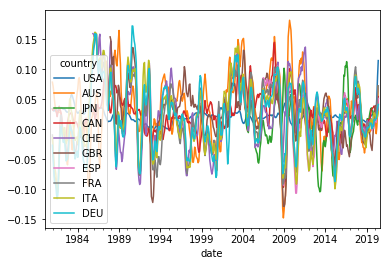

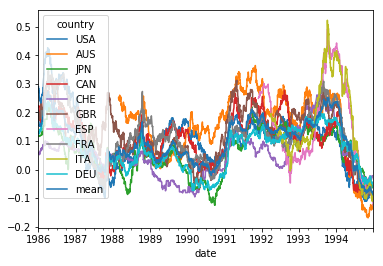

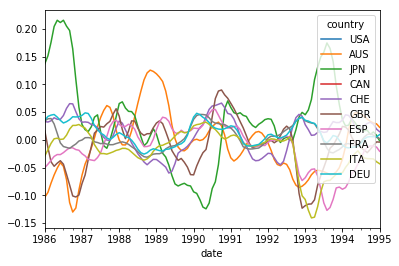

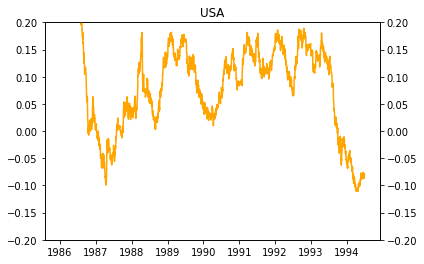

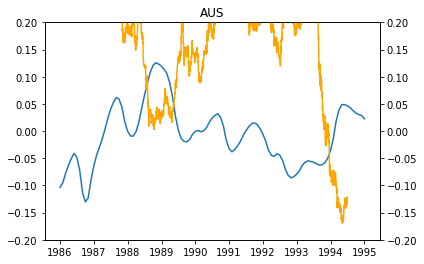

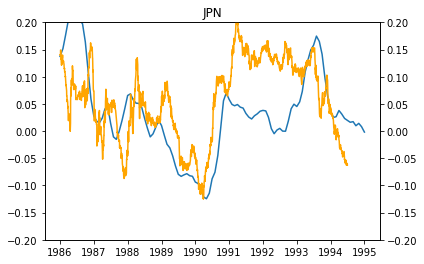

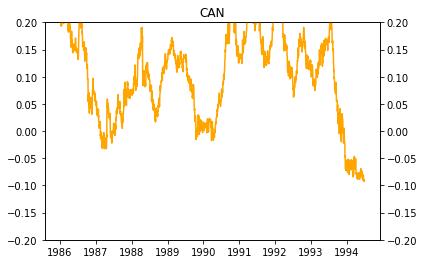

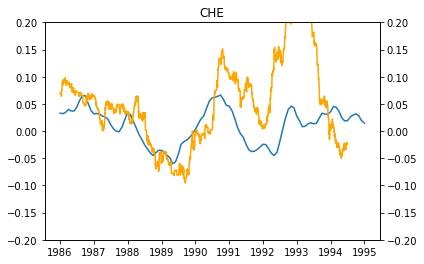

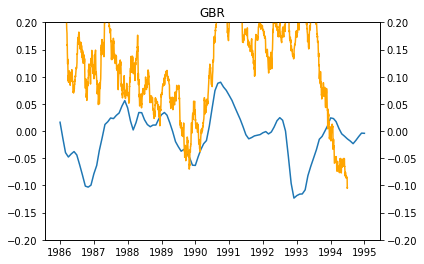

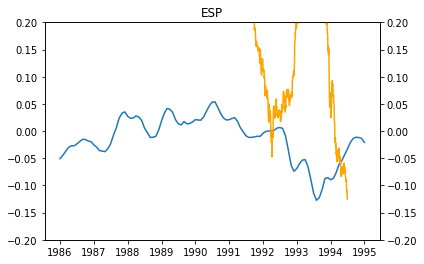

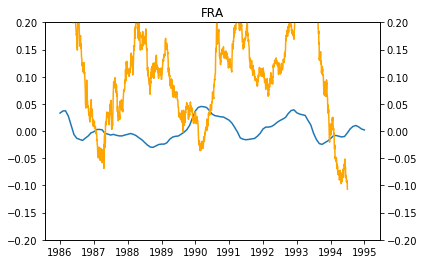

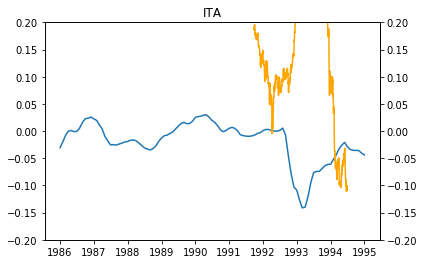

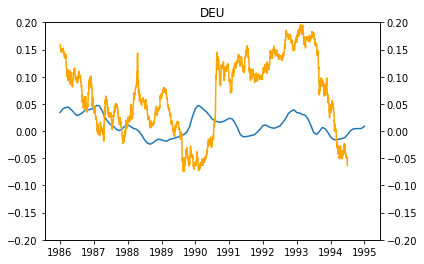

['1995-01-01', '2003-01-01']


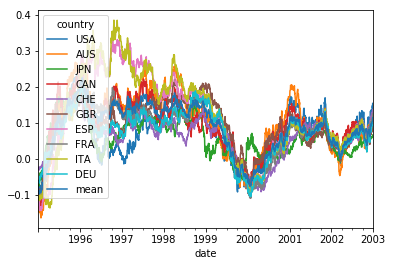

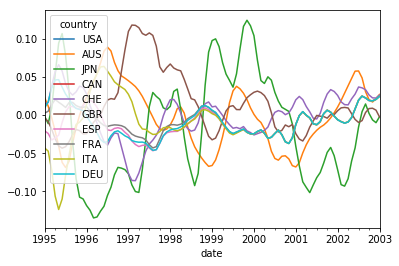

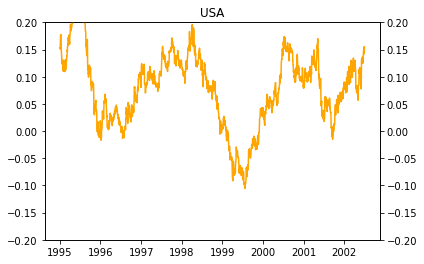

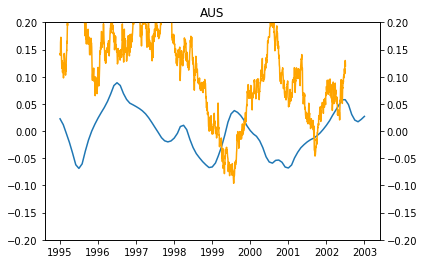

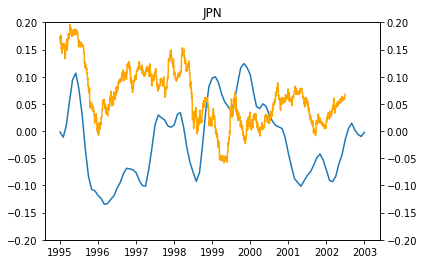

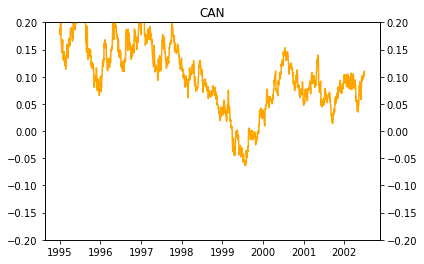

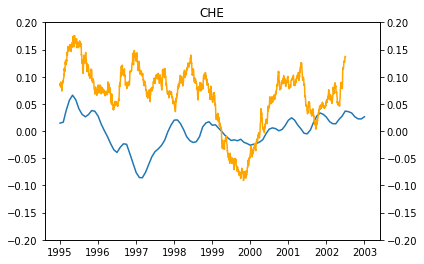

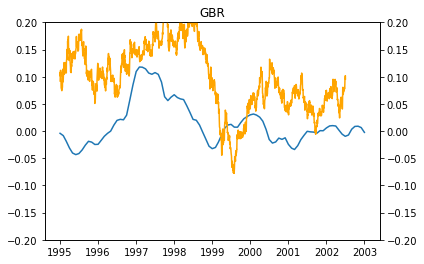

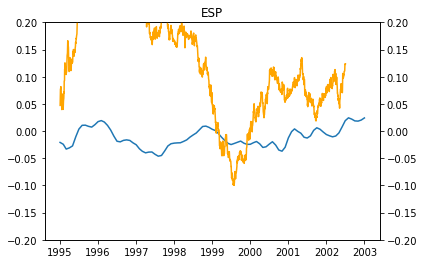

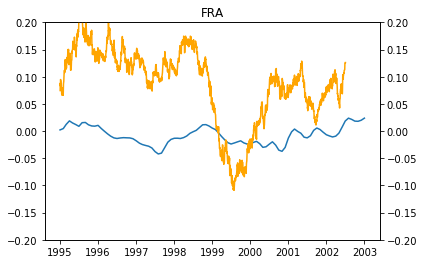

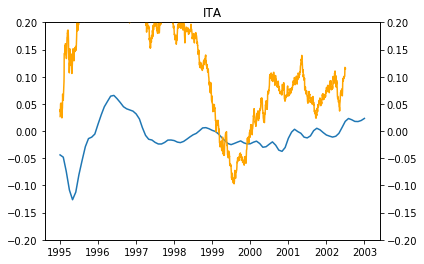

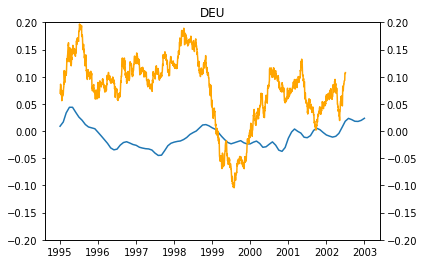

['2003-01-01', '2008-01-01']


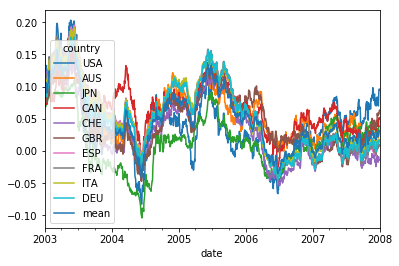

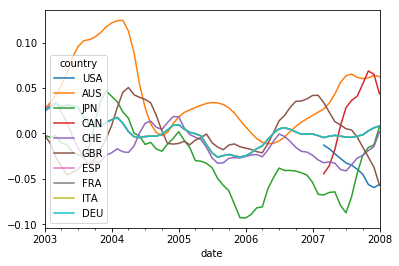

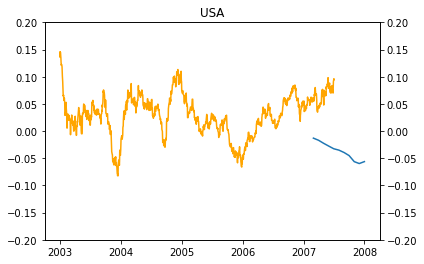

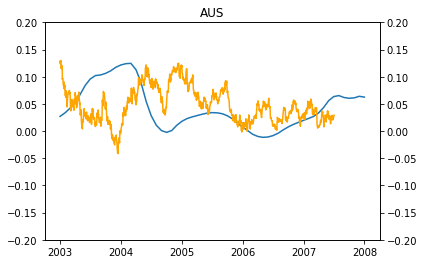

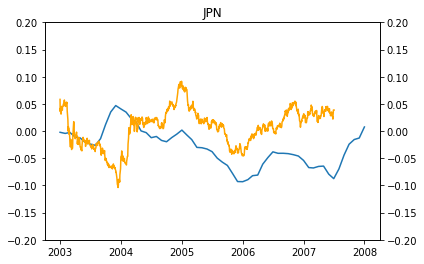

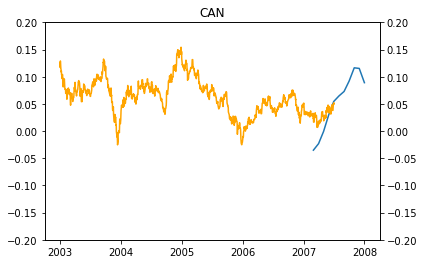

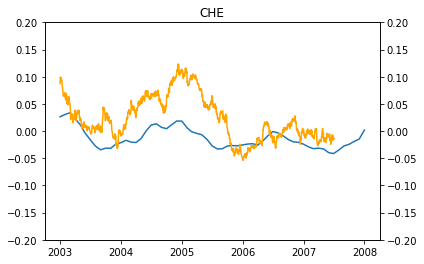

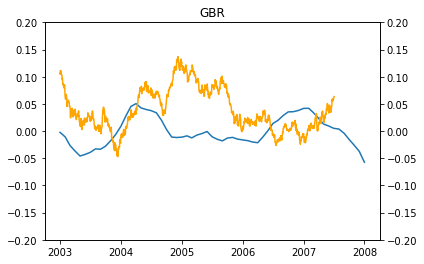

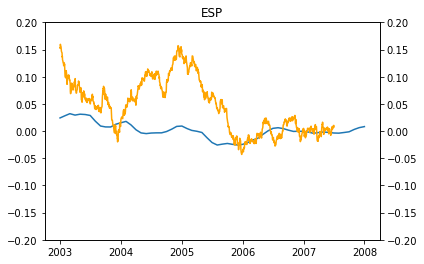

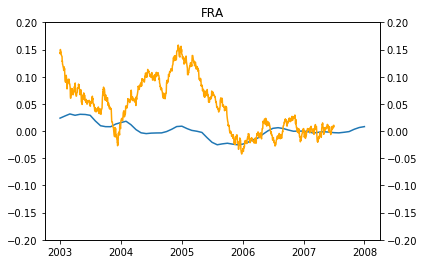

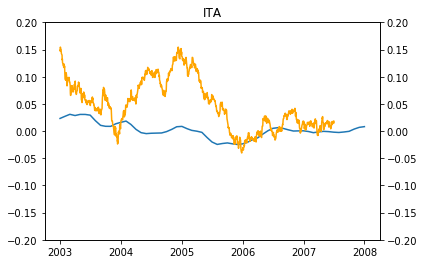

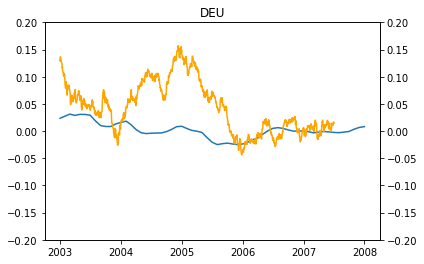

['2008-01-01', '2016-01-01']


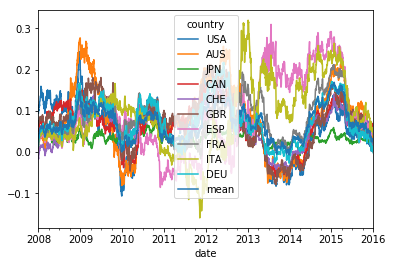

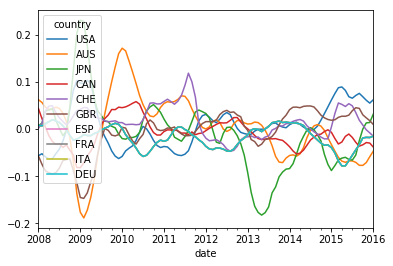

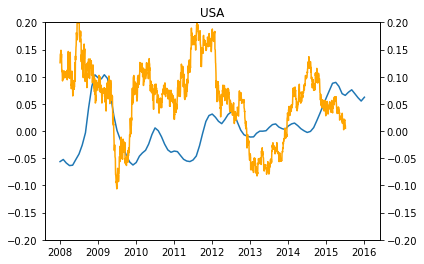

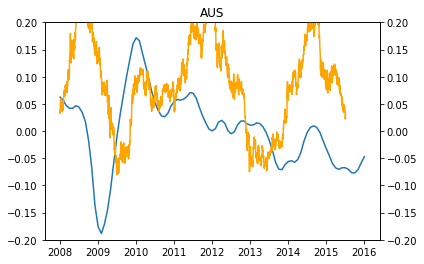

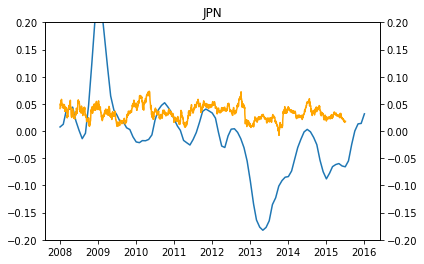

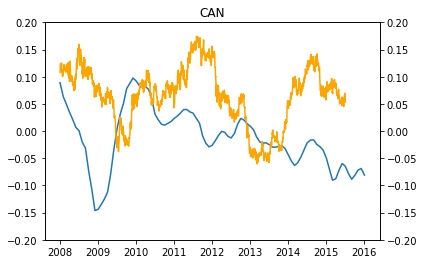

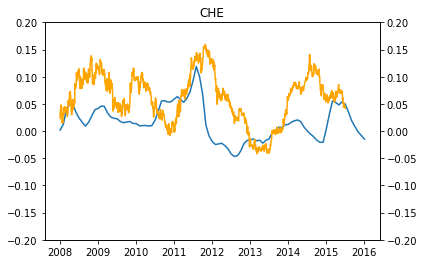

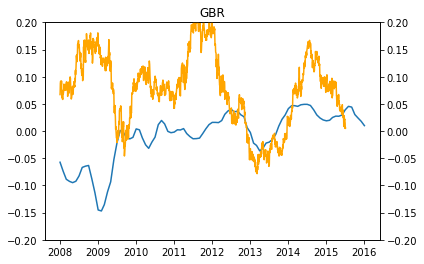

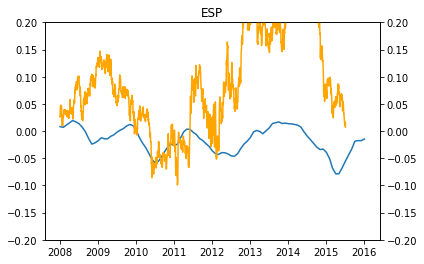

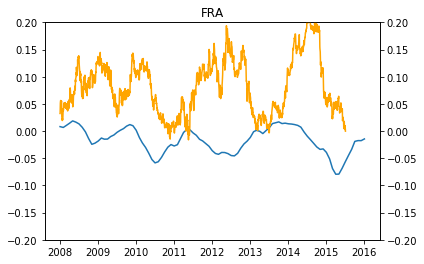

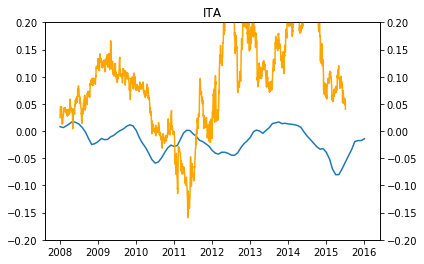

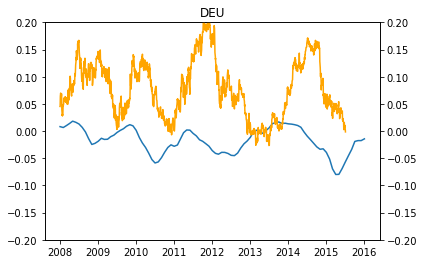

['2016-01-01', '2020-01-01']


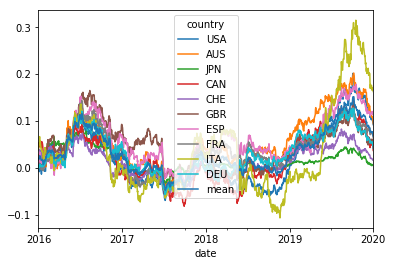

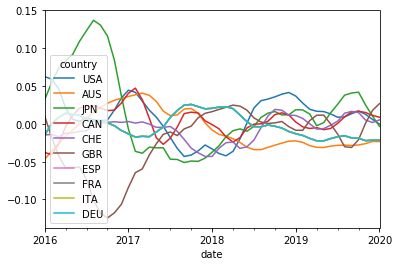

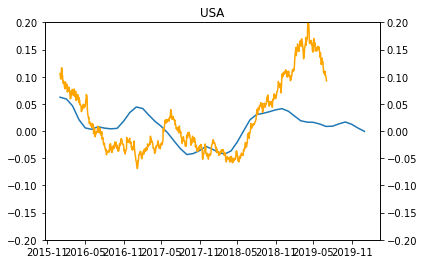

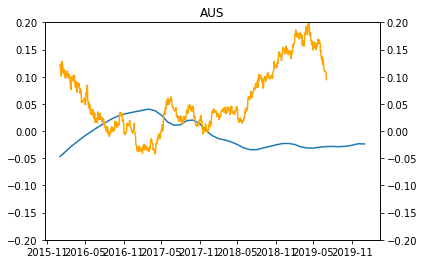

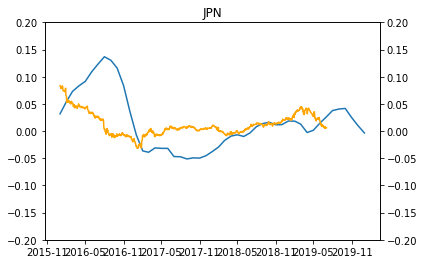

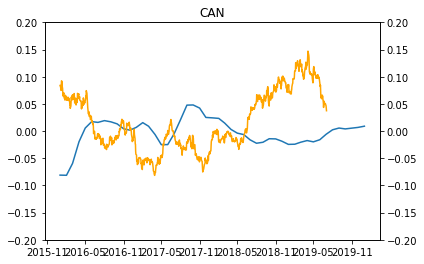

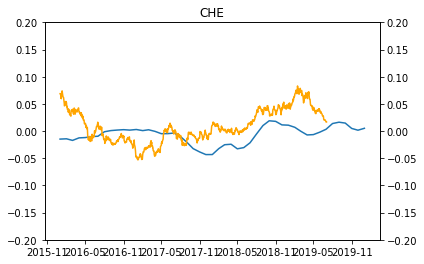

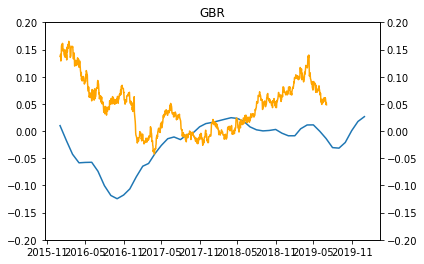

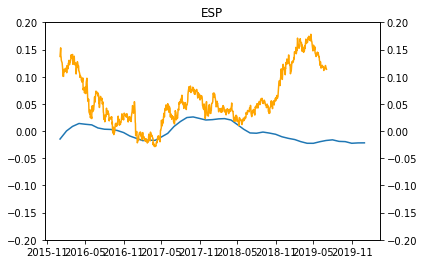

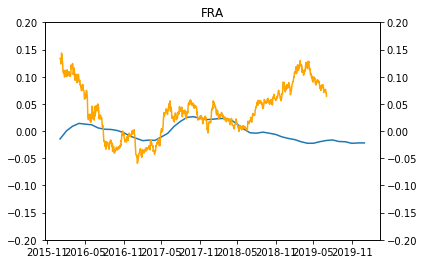

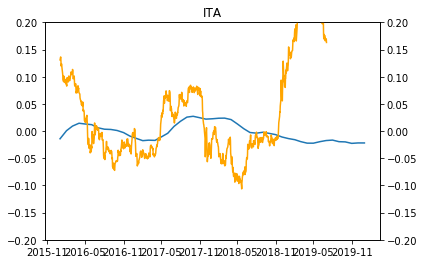

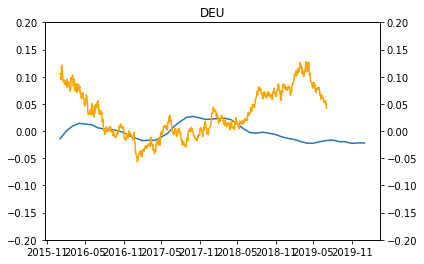

In [45]:
locs = countryList
indicator_two_attempt_one.loc[:,locs].plot()
tf0 = ["1986-01-01", "1995-01-01"]
tf1 = ["1995-01-01", "2003-01-01"]
tf2 = ["2003-01-01", "2008-01-01"]
tf3 = ["2008-01-01", "2016-01-01"]
tf4 = ["2016-01-01", "2020-01-01"]
tfs = [tf0, tf1, tf2, tf3, tf4]

for tf in tfs:
    print(tf)
    bond_one_year_rolling_returns.loc[tf[0]:tf[1],locs+['mean']].plot()
    change_in_twi.loc[tf[0]:tf[1],locs].plot()
    for country in locs:
        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()
        ax1.plot(change_in_twi_proxy.loc[tf[0]:tf[1],country].to_timestamp())
        ax2.plot(bond_one_year_rolling_returns.loc[tf[0]:tf[1],country].shift(-130).to_timestamp(), color = "orange")
        plt.title(country)
        ax1.set(ylim=(-.2, .2))
        ax2.set(ylim=(-.2, .2))
        uf.align_yaxis(ax1, 0, ax2, 0)
        plt.show()

In [46]:
for country in locs:
    s0 = country + "mean" 
    change_in_twi_proxy[s0] = change_in_twi_proxy.loc[:, country].expanding().mean()
    
for country in locs:
    s0 = country + "mean" 
    s1 = country + "diff_from_mean"
    change_in_twi_proxy[s1] = change_in_twi_proxy[country] - change_in_twi_proxy[s0]

    indicator_three_b = list(change_in_twi_proxy.columns)[-10:]
    indicator_three_b = change_in_twi_proxy.loc[:, indicator_three_b]
indicator_three_b


indicator_three_b["mean"] = indicator_three_b.mean(axis = 1)
indicator_three_b_centered = indicator_three_b.subtract(indicator_three_b["mean"], axis = 0)
indicator_three_b_centered

country  USAdiff_from_mean  AUSdiff_from_mean  JPNdiff_from_mean  \
date                                                               
1980-01                NaN                NaN                NaN   
1980-02                NaN                NaN                NaN   
1980-03                NaN                NaN                NaN   
1980-04                NaN                NaN                NaN   
1980-05                NaN                NaN                NaN   
1980-06                NaN                NaN                NaN   
1980-07                NaN                NaN                NaN   
1980-08                NaN                NaN                NaN   
1980-09                NaN                NaN                NaN   
1980-10                NaN                NaN                NaN   
1980-11                NaN                NaN                NaN   
1980-12                NaN                NaN                NaN   
1981-01                NaN                NaN                NaN   
1981-02                NaN                NaN                NaN   
1981-03                NaN           0.000000           0.000000   
1981-04                NaN           0.004159          -0.011434   
1981-05                NaN           0.007148          -0.024597   
1981-06                NaN           0.009851          -0.033678   
1981-07                NaN           0.012474          -0.046839   
1981-08                NaN           0.014661          -0.056666   
1981-09                NaN           0.016529          -0.060335   
1981-10                NaN           0.012721          -0.059772   
1981-11                NaN           0.003136          -0.054198   
1981-12                NaN          -0.009235          -0.041728   
1982-01                NaN          -0.020058          -0.029616   
1982-02                NaN          -0.024631          -0.033375   
1982-03                NaN          -0.027601          -0.047806   
1982-04                NaN          -0.029562          -0.050941   
1982-05                NaN          -0.032971          -0.039912   
1982-06                NaN          -0.032403          -0.037446   
...                    ...                ...                ...   
2018-03          -0.053049          -0.025831          -0.024121   
2018-04          -0.046017          -0.028476          -0.015323   
2018-05          -0.025787          -0.029818          -0.009444   
2018-06          -0.001995          -0.033083          -0.009558   
2018-07           0.019281          -0.034668          -0.001480   
2018-08           0.026449          -0.036878           0.007869   
2018-09           0.025046          -0.037112           0.010164   
2018-10           0.026136          -0.035774           0.010750   
2018-11           0.030179          -0.032271           0.006901   
2018-12           0.035134          -0.026602           0.010145   
2019-01           0.032227          -0.024172           0.018857   
2019-02           0.025152          -0.023681           0.020884   
2019-03           0.019165          -0.025585           0.017724   
2019-04           0.019347          -0.024885           0.005153   
2019-05           0.018739          -0.025222           0.009060   
2019-06           0.013512          -0.025315           0.020099   
2019-07           0.007270          -0.026059           0.029296   
2019-08           0.005820          -0.027600           0.039470   
2019-09           0.010040          -0.027988           0.042209   
2019-10           0.012351          -0.028349           0.042175   
2019-11           0.009836          -0.024746           0.026927   
2019-12           0.003029          -0.021693           0.012356   
2020-01          -0.002573          -0.021430          -0.000698   
2020-02          -0.002053          -0.024338          -0.008795   
2020-03           0.010995          -0.033041          -0.002376   
2020-04           0.029137          -0.038669           

['1986-01-01', '1995-01-01']


NameError: name 'align_yaxis' is not defined

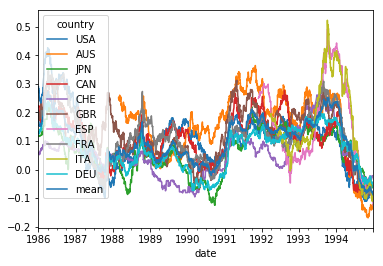

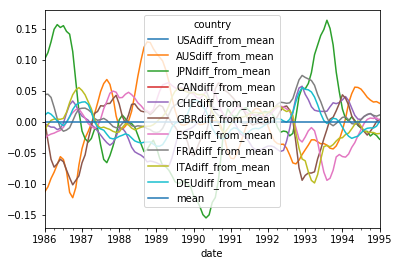

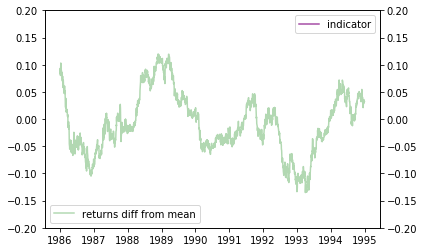

In [47]:
#final?
fshift = bond_one_year_rolling_returns.shift(-261)
for tf in tfs:
    print(tf)
    bond_one_year_rolling_returns.loc[tf[0]:tf[1],locs+['mean']].plot()
    indicator_three_b_centered.loc[tf[0]:tf[1],:].plot()
    for country in locs:
        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()
        s = country + "diff_from_mean"
        signal = indicator_three_b_centered.loc[tf[0]:tf[1], s]
        ax1.plot(signal.to_timestamp(), color = 'purple', alpha=.7)
        returns_diff_from_global = fshift.loc[tf[0]:tf[1],country] - fshift.loc[tf[0]:tf[1],"mean"]
        ax2.plot(returns_diff_from_global.to_timestamp(), color = "green", alpha=.3)
        ax1.legend(["indicator"], loc = 'upper right')
        ax2.legend(["returns diff from mean"], loc="lower left")
        ax1.set(ylim=(-.2, .2))
        ax2.set(ylim=(-.2, .2))
        align_yaxis(ax1, 0, ax2, 0)
        plt.title(country)
        plt.show()
        print(returns_diff_from_global.resample('M').last().corr(signal))

In [ ]:
#plotting both signals
#final?
fshift = bond_one_year_rolling_returns.shift(-261)
for tf in tfs:
    print(tf)
    bond_one_year_rolling_returns.loc[tf[0]:tf[1],locs+['mean']].plot()
    indicator_three_b_centered.loc[tf[0]:tf[1],:].plot()
    for country in locs:
        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()
        s = country + "signal"
        signal = signal_centered.loc[tf[0]:tf[1], s]
        ax1.plot(signal.to_timestamp(), color = 'blue', alpha=.7)
        s = country + "diff_from_mean"
        signal2 = indicator_three_b_centered.loc[tf[0]:tf[1], s]
        ax1.plot(signal2.to_timestamp(), color = 'purple', alpha=.7)
        returns_diff_from_global = fshift.loc[tf[0]:tf[1],country] - fshift.loc[tf[0]:tf[1],"mean"]
        combined = signal + signal2
        avg = combined /2
        ax1.plot(combined.to_timestamp(), color = 'orange', alpha=.7)
        ax1.plot(avg.to_timestamp(), color = 'black', alpha=1)
        ax2.plot(returns_diff_from_global.to_timestamp(), color = "green", alpha=.9)
        ax1.legend(["indicator"], loc = 'upper right')
        ax2.legend(["returns diff from mean"], loc="lower left")
        ax1.set(ylim=(-.2, .2))
        ax2.set(ylim=(-.2, .2))
        align_yaxis(ax1, 0, ax2, 0)
        plt.title(country)
        plt.show()
        #print(returns_diff_from_global.resample('M').last().corr(signal))

In [48]:
signal_one = signal_centered
signal_one_quarterly = signal_one.resample("Q").last()
quarterly_bond_index = bondReturnIdx_locFX.resample("Q").last()
signal_one_quarterly = signal_one_quarterly.iloc[:, :-1]
signal_one_quarterly.columns = countryList
signal_one_quarterly

USA       AUS       JPN       CAN       CHE       GBR       ESP  \
date                                                                           
1980Q1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1980Q2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1980Q3       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1980Q4       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1981Q1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1981Q2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1981Q3       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1981Q4       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1982Q1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1982Q2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1982Q3       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1982Q4       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1983Q1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1983Q2       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1983Q3       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1983Q4       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1984Q1  0.148439  0.353746 -0.323729       NaN       NaN       NaN       NaN   
1984Q2  0.218580  0.269874 -0.251530       NaN       NaN       NaN       NaN   
1984Q3  0.114798  0.245247 -0.221796       NaN       NaN       NaN       NaN   
1984Q4  0.206654  0.189837 -0.280118       NaN       NaN       NaN       NaN   
1985Q1  0.180372  0.132564 -0.135280       NaN       NaN       NaN       NaN   
1985Q2  0.116338  0.202841 -0.247061       NaN       NaN       NaN       NaN   
1985Q3  0.162878  0.143420 -0.251643       NaN       NaN       NaN       NaN   
1985Q4  0.037683  0.250856 -0.227200       NaN       NaN       NaN       NaN   
1986Q1 -0.078813  0.263826 -0.057088       NaN       NaN       NaN       NaN   
1986Q2 -0.009752  0.214791 -0.185824       NaN       NaN       NaN       NaN   
1986Q3 -0.048121  0.277511 -0.174404       NaN       NaN       NaN       NaN   
1986Q4 -0.131340  0.193955  0.004454       NaN       NaN       NaN       NaN   
1987Q1 -0.148062  0.150064 -0.037140       NaN       NaN       NaN       NaN   
1987Q2  0.049846  0.207185 -0.336994       NaN       NaN       NaN       NaN   
...          ...       ...       ...       ...       ...       ...       ...   
2013Q2  0.011642  0.003246 -0.120283 -0.078476 -0.140380 -0.064324  0.256908   
2013Q3  0.091067  0.054542 -0.251908 -0.028147 -0.149510  0.086240  0.158713   
2013Q4  0.113563  0.137142 -0.286387 -0.013540 -0.192676  0.076954  0.190985   
2014Q1  0.111047  0.147581 -0.231402  0.006939 -0.114575  0.077814  0.037905   
2014Q2  0.150556  0.101473 -0.152759  0.037102 -0.110431  0.114203 -0.031562   
2014Q3  0.165683  0.097701 -0.083487  0.034882 -0.102367  0.107759 -0.031640   
2014Q4  0.196666  0.100485 -0.023557  0.097672 -0.069765  0.090837 -0.131513   
2015Q1  0.189295  0.110624  0.013035  0.093786  0.037008  0.114499 -0.184471   
2015Q2  0.142371  0.085521 -0.050606  0.081418 -0.052027  0.067575 -0.036562   
2015Q3  0.107286  0.062347 -0.081501  0.027931 -0.106783  0.048818  0.023154   
2015Q4  0.114414  0.133038 -0.044025  0.069110 -0.071432  0.073923 -0.086547   
2016Q1  0.077125  0.085873 -0.062188  0.050621 -0.039914  0.035748 -0.014619   
2016Q2  0.069370  0.081305 -0.072690  0.057525 -0.066074  0.032759  0.014372   
2016Q3  0.066799  0.062213  0.006140  0.032648 -0.017962 -0.069136 -0.027171   
2016Q4  0.091336  0.086718 -0.153825  0.024591 -0.060937  0.009027 -0.027582   
2017Q1  0.064648  0.089592 -0.125425  0.022059 -0.105783 -0.077996  0.036961   
2017Q2  0.009527  0.036369 -0.118215 -0.024007 -0.074272 -0.088270  0.062754   
2017Q3 -0.018

In [ ]:
quarterly_bonds_shifted = quarterly_bond_index.shift(-1)
quarterly_returns_shifted = quarterly_bonds_shifted.pct_change(1)
quarterly_returns_shifted = quarterly_returns_shifted[countryList]
quarterly_returns_shifted

In [ ]:
p_and_l_one = signal_one_quarterly * quarterly_returns_shifted * 2
p_and_l_one
for country in countryList:
    print(country)
    p_and_l_one[country].plot()
    plt.show()

In [ ]:
p_and_l_one["total"] = p_and_l_one.sum(axis=1)

In [ ]:
ev_one = p_and_l_one['total'][16:].mean() * 4
std_one = p_and_l_one['total'][16:].std() * 2
print(ev_one, std_one)

In [ ]:
corr_returns_one = p_and_l_one['total'].corr(quarterly_returns_shifted.mean(axis=1))
print(corr_returns_one)

In [ ]:
signal_three = indicator_three_b_centered
signal_three_quarterly = signal_three.resample("Q").last()
signal_three_order = list(signal_three_quarterly.columns)
signal_three_order_clean = list(map(lambda x: x.replace("diff_from_mean",""), signal_three_order))
signal_three_quarterly.columns = signal_three_order_clean
signal_three_quarterly = signal_three_quarterly.iloc[:, :-1]

In [ ]:
p_and_l_three = signal_three_quarterly * quarterly_returns_shifted
p_and_l_three
for country in countryList:
    print(country)
    p_and_l_three[country].plot()
    plt.show()

In [ ]:
p_and_l_three["total"] = p_and_l_three.sum(axis=1)

In [ ]:
ev_three = p_and_l_three['total'][17:].mean() * 4
std_three = p_and_l_three['total'][17:].std() * 2
print(ev_three, std_three)

In [ ]:
for country in countryList:
    a = p_and_l_three[country][4:].mean() * 4
    b = p_and_l_three[country][4:].std() * 2
    print(a, b, country)

In [ ]:
corr_returns_three = p_and_l_three['total'].corr(quarterly_returns_shifted.mean(axis=1))
print(corr_returns_three)

In [ ]:
cross_corr = p_and_l_three['total'].corr(p_and_l_one['total'])
print(cross_corr)

In [ ]:
total_signal =  signal_one_quarterly + 3 * signal_three_quarterly 
p_and_l_total = total_signal * quarterly_returns_shifted
p_and_l_total
for country in countryList:
    print(country)
    p_and_l_total[country].plot()
    plt.show()

In [ ]:
p_and_l_total["total"] = p_and_l_total.sum(axis=1)

In [ ]:
ev_total = p_and_l_total['total'][17:].mean() * 4
std_total = p_and_l_total['total'][17:].std() * 2
print(ev_total, std_total)

In [ ]:
p_and_l_total['total'].plot()
plt.show()

In [ ]:
demo = p_and_l_total['total'] + 1
demo.cumprod().plot()
plt.show()

In [ ]:
p_and_l_total['total'].corr(quarterly_returns_shifted.mean(axis=1))